ADHD Data:


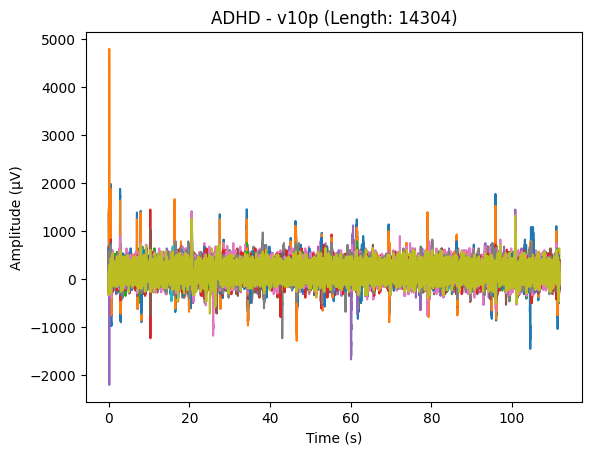

v10p: Length = 14304


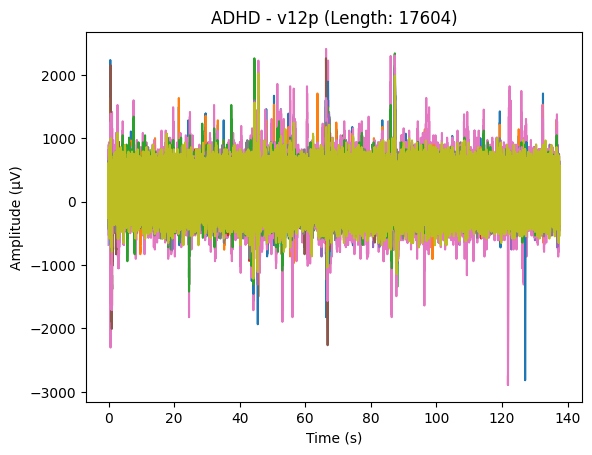

v12p: Length = 17604


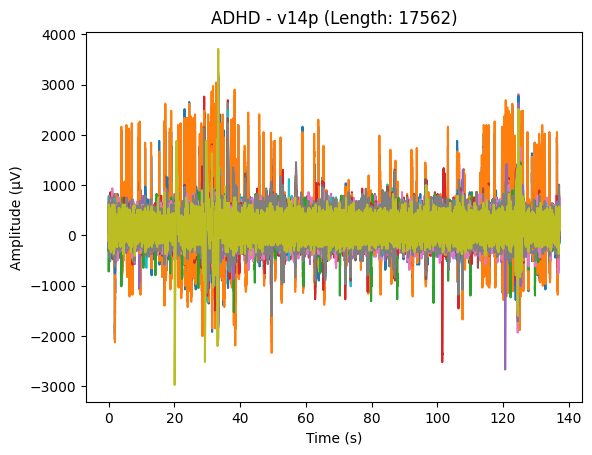

v14p: Length = 17562


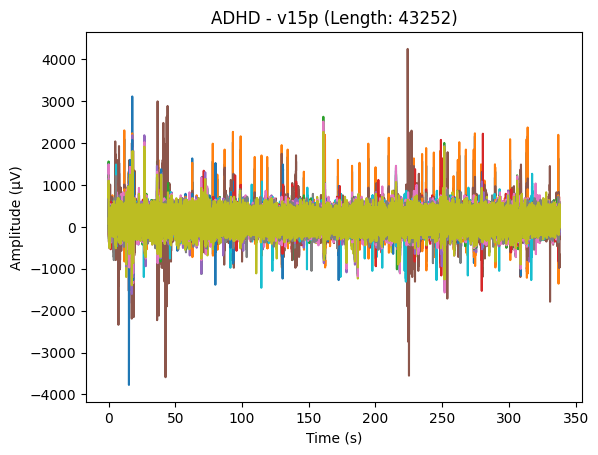

v15p: Length = 43252


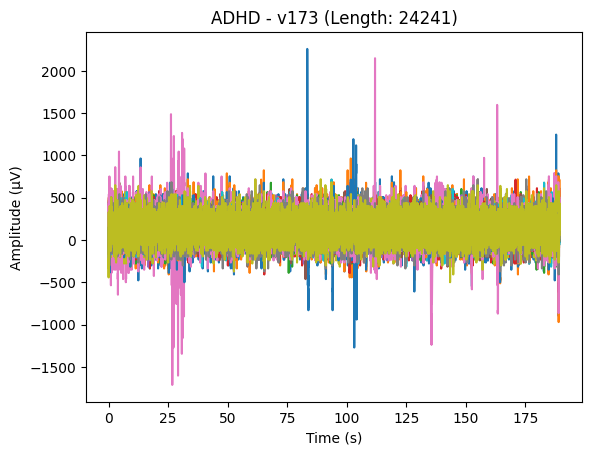

v173: Length = 24241


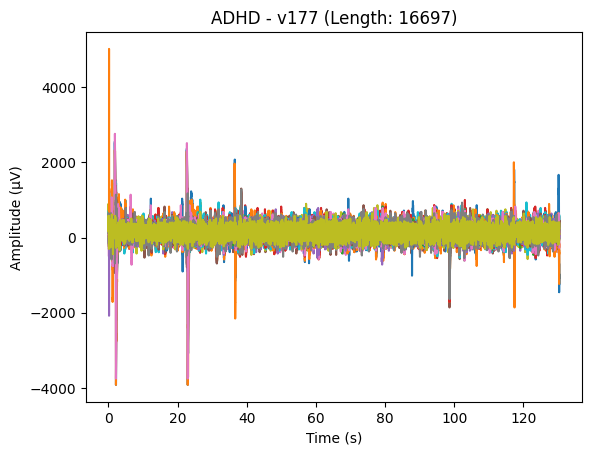

v177: Length = 16697


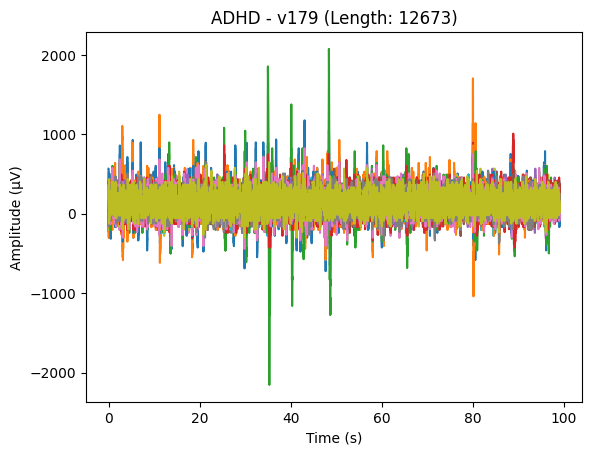

v179: Length = 12673


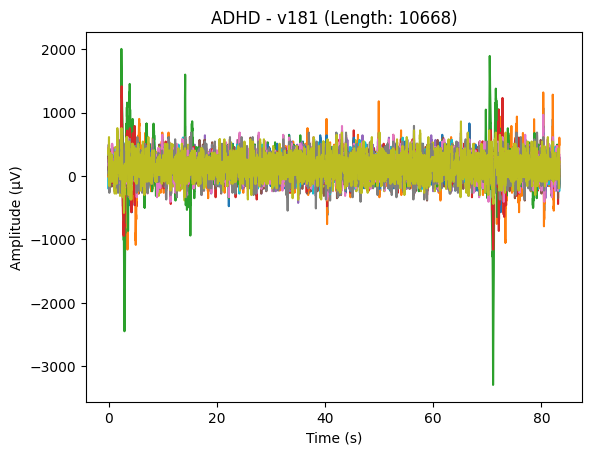

v181: Length = 10668


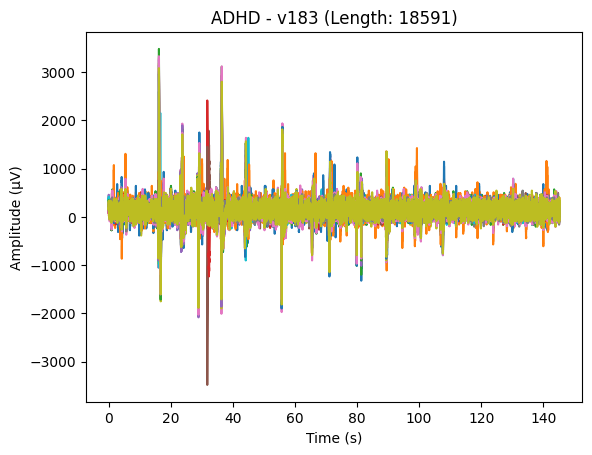

v183: Length = 18591


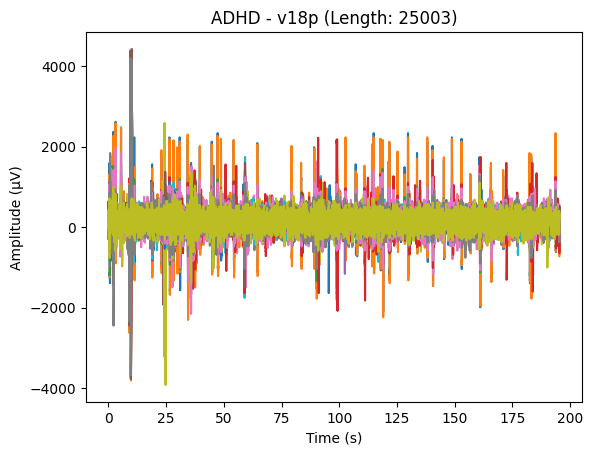

v18p: Length = 25003


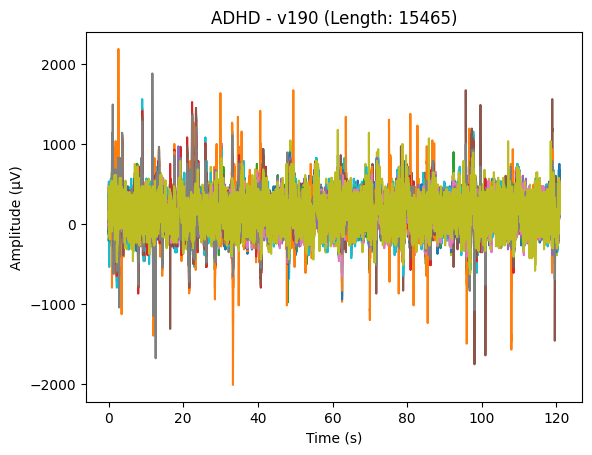

v190: Length = 15465


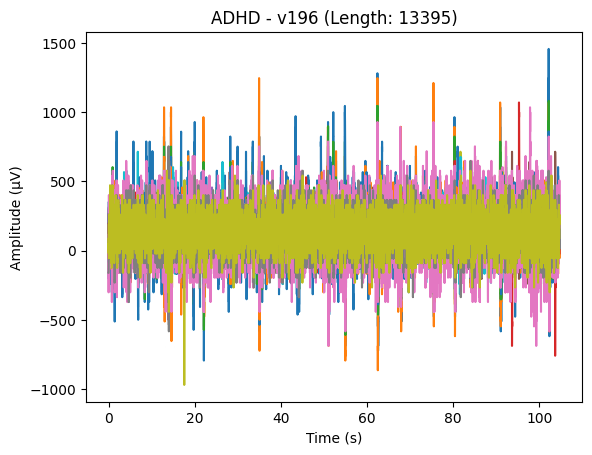

v196: Length = 13395


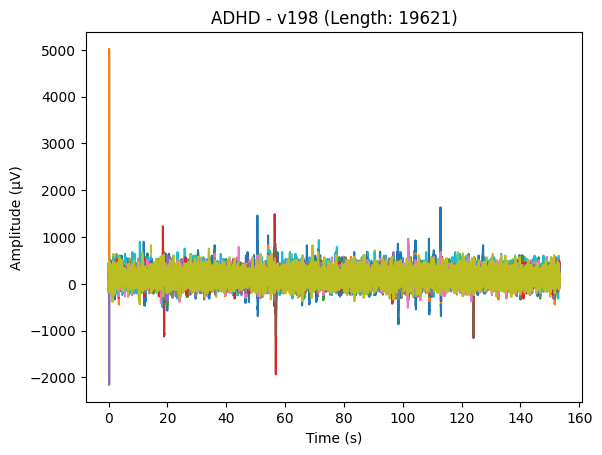

v198: Length = 19621


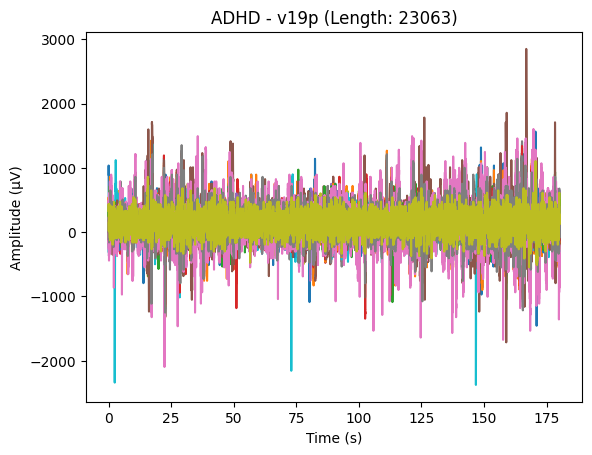

v19p: Length = 23063


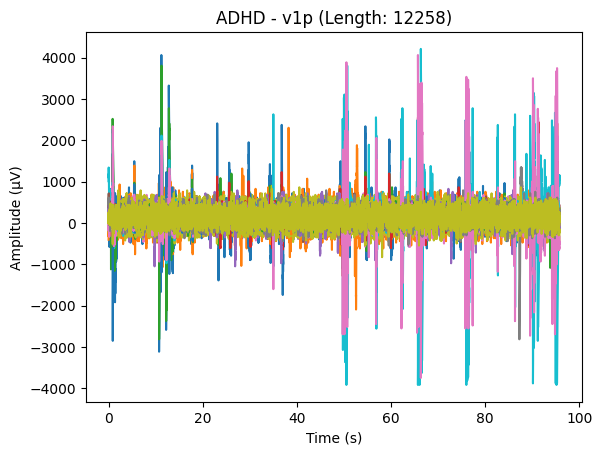

v1p: Length = 12258


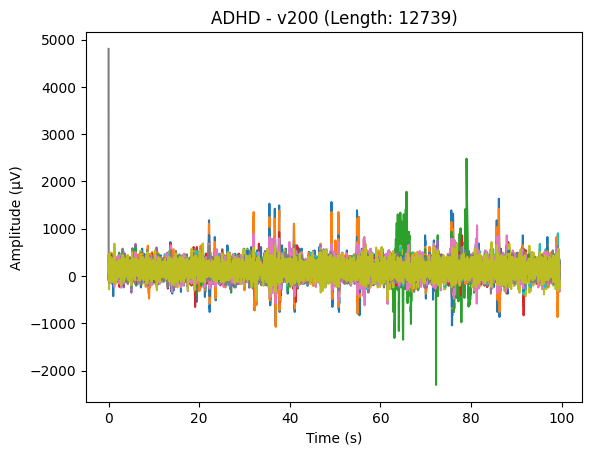

v200: Length = 12739


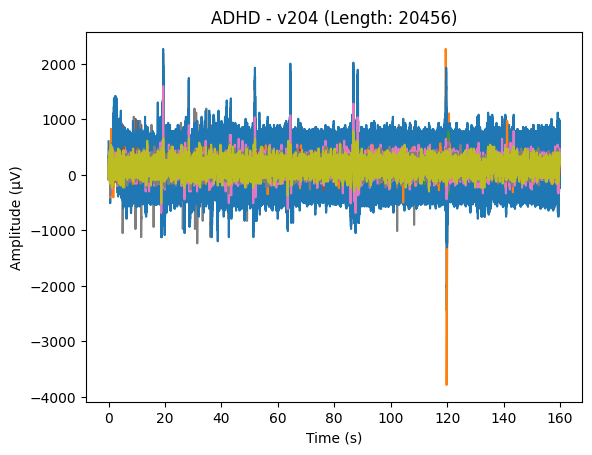

v204: Length = 20456


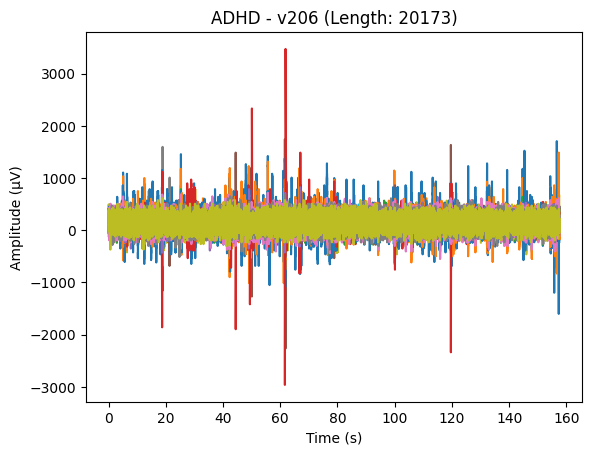

v206: Length = 20173


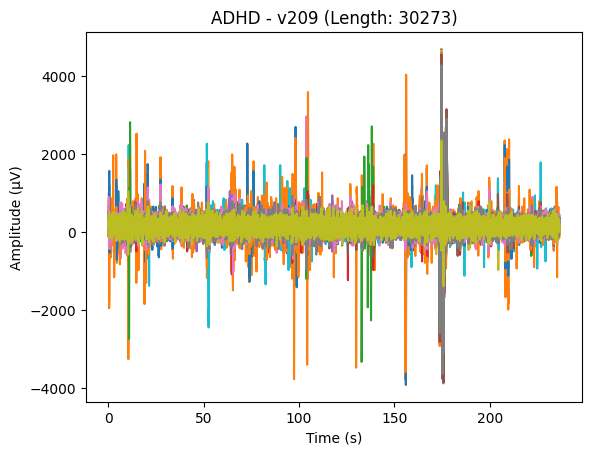

v209: Length = 30273


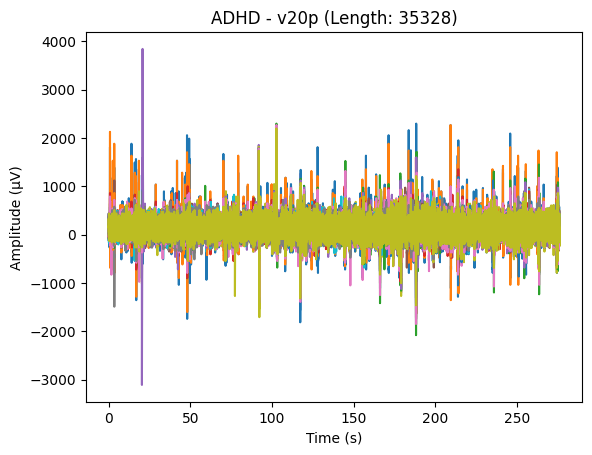

v20p: Length = 35328


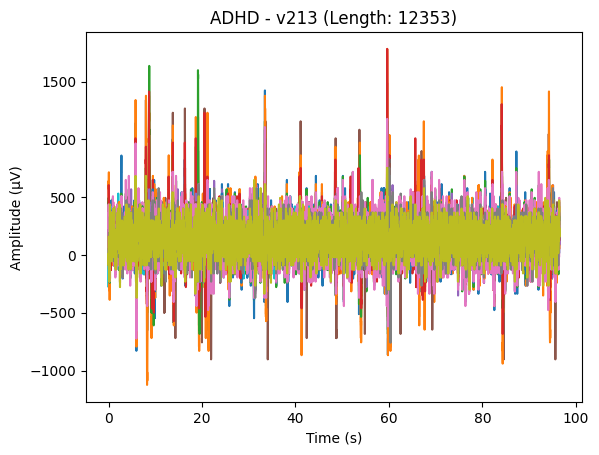

v213: Length = 12353


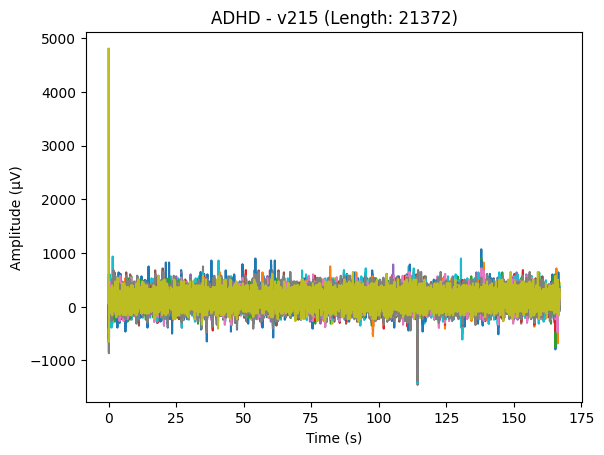

v215: Length = 21372


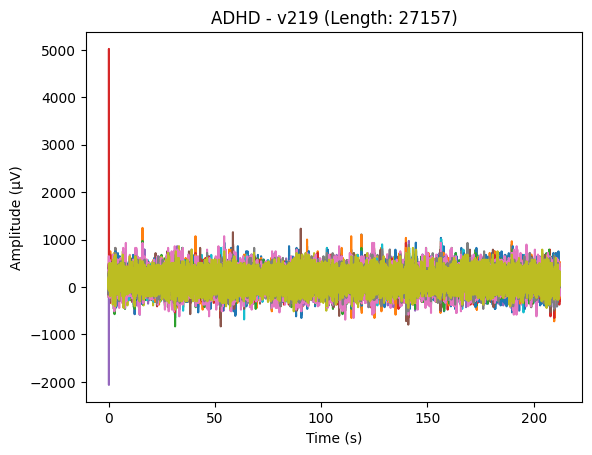

v219: Length = 27157


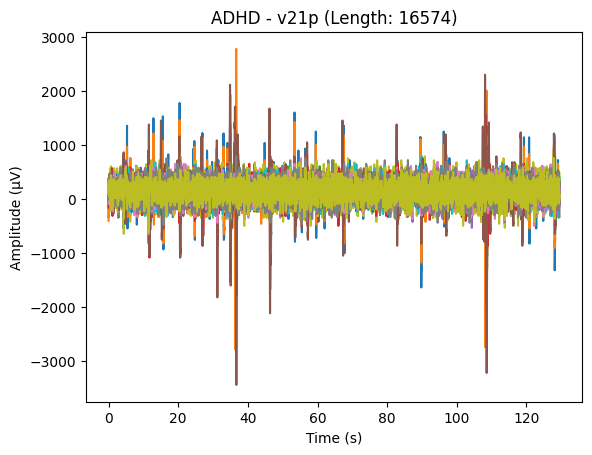

v21p: Length = 16574


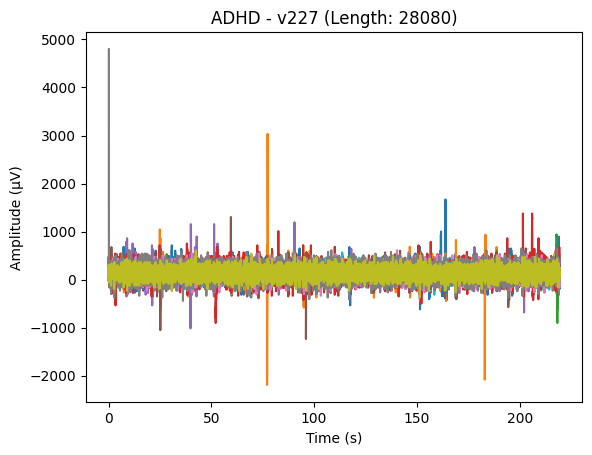

v227: Length = 28080


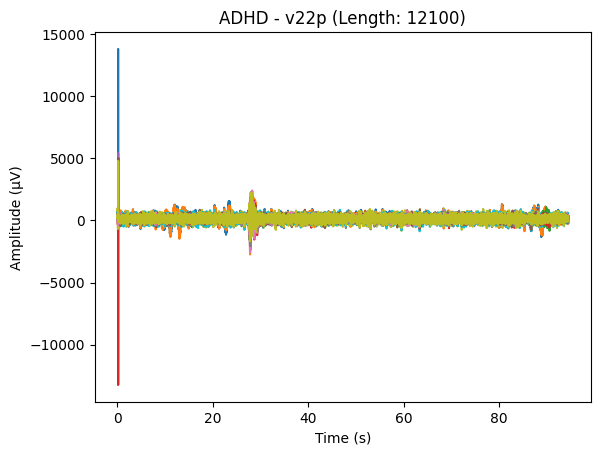

v22p: Length = 12100


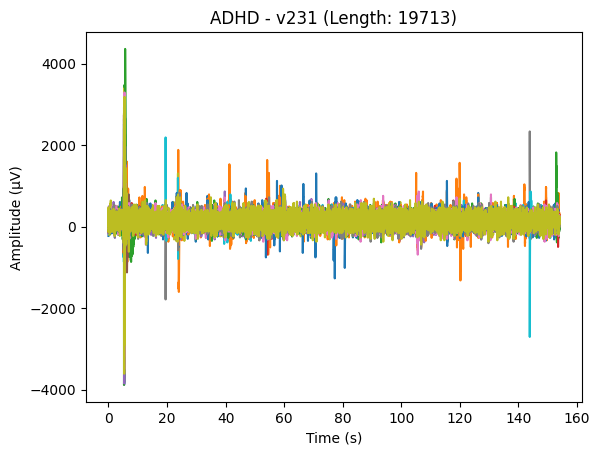

v231: Length = 19713


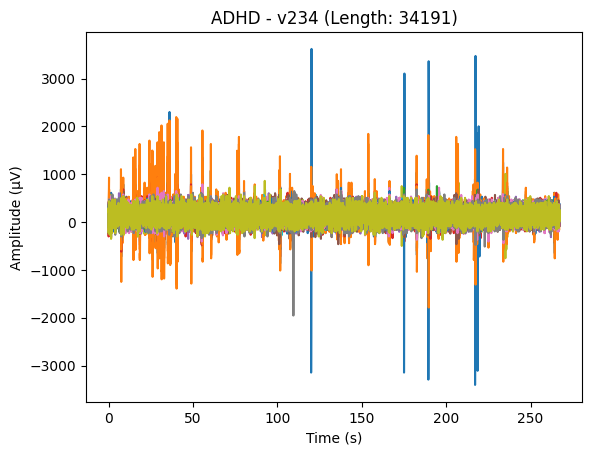

v234: Length = 34191


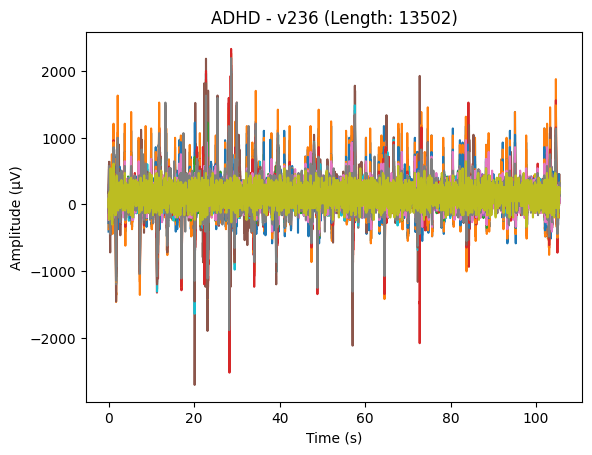

v236: Length = 13502


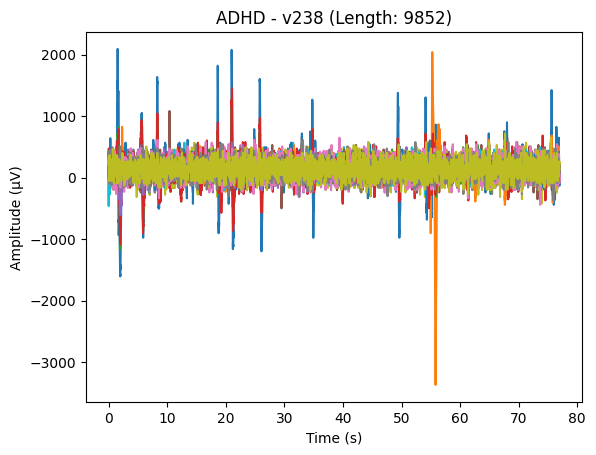

v238: Length = 9852


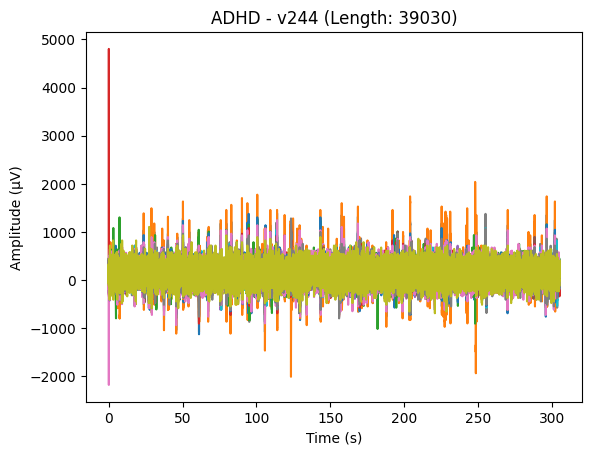

v244: Length = 39030


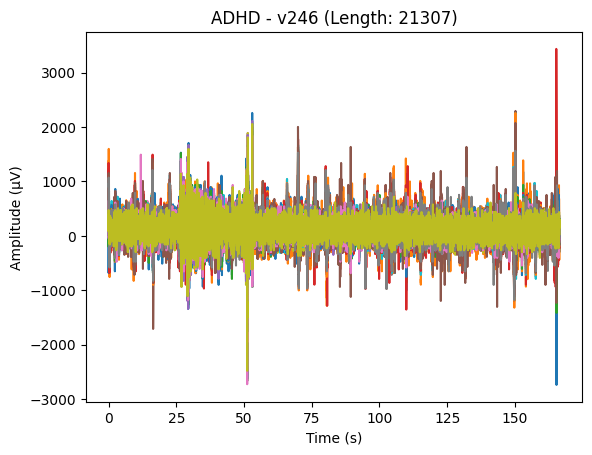

v246: Length = 21307


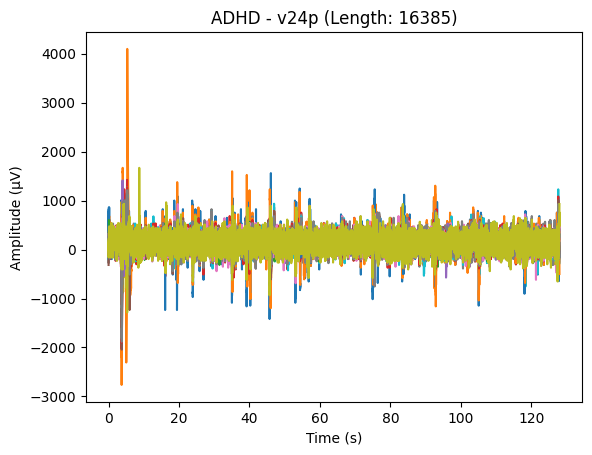

v24p: Length = 16385


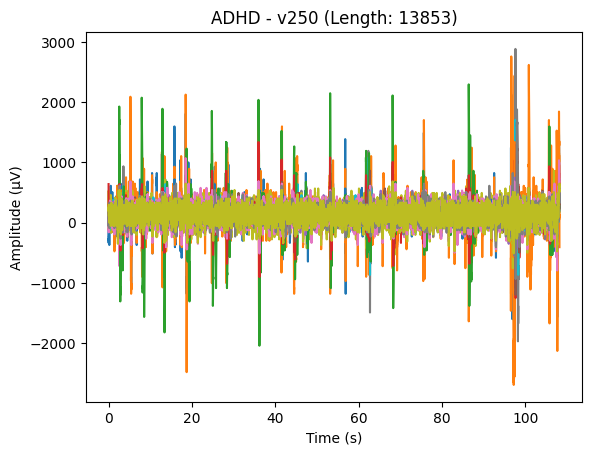

v250: Length = 13853


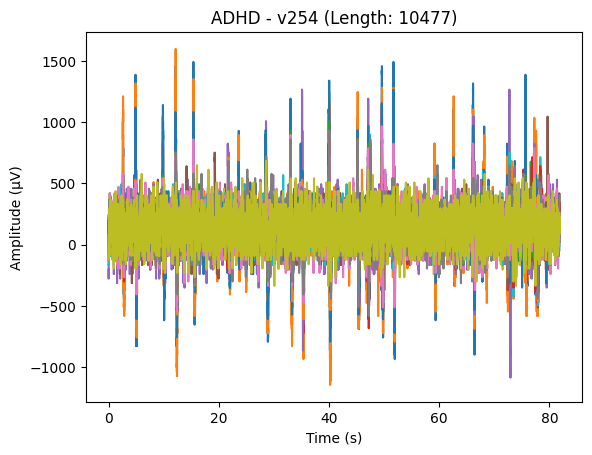

v254: Length = 10477


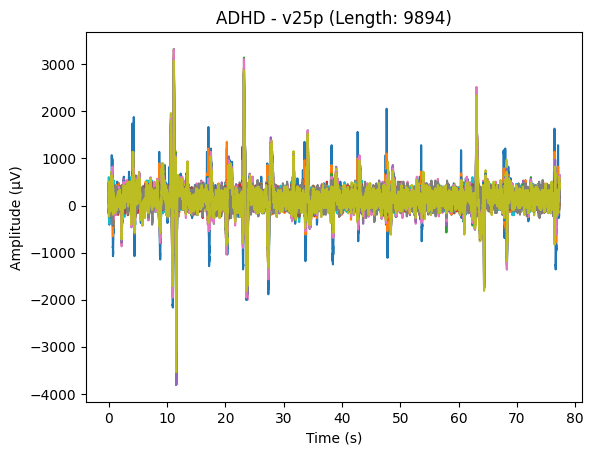

v25p: Length = 9894


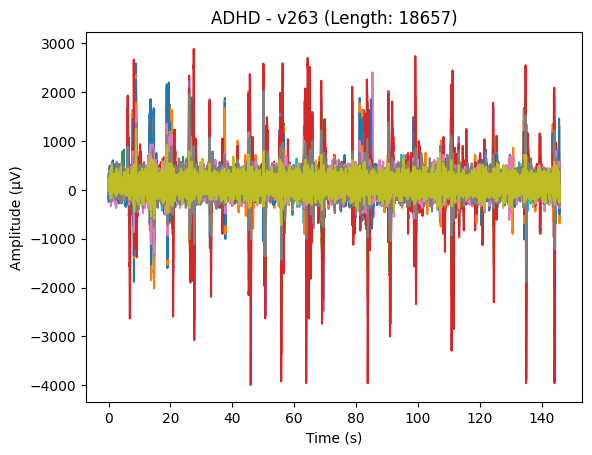

v263: Length = 18657


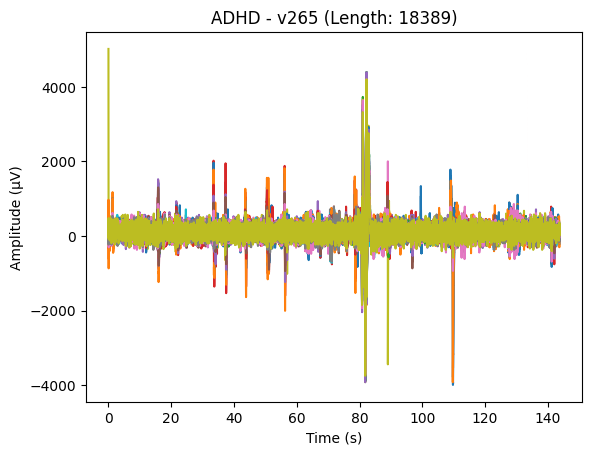

v265: Length = 18389


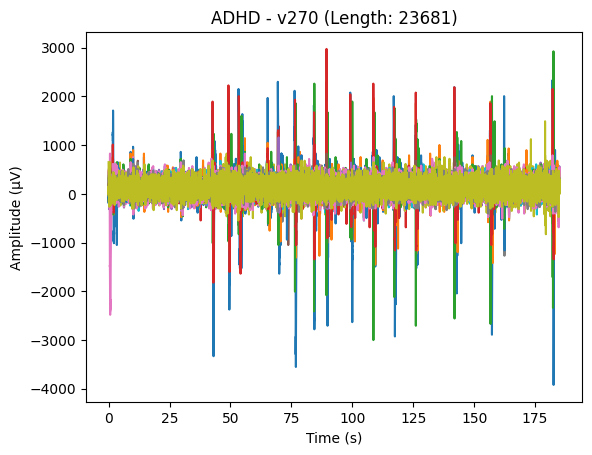

v270: Length = 23681


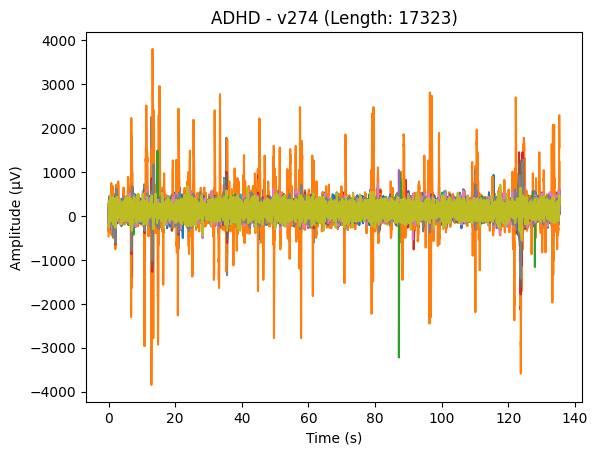

v274: Length = 17323


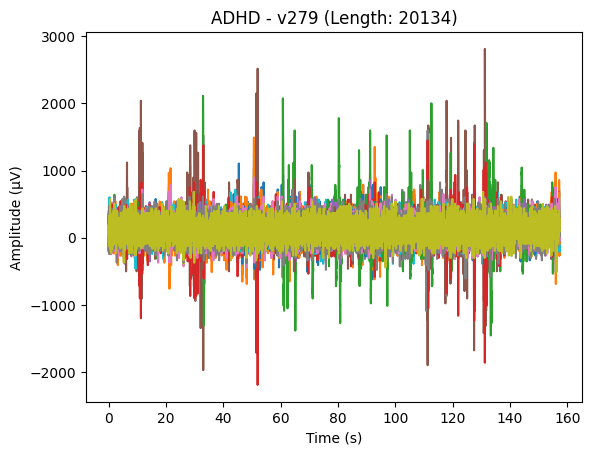

v279: Length = 20134


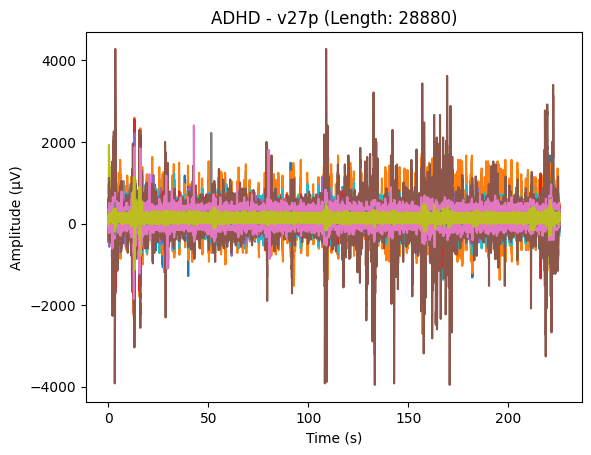

v27p: Length = 28880


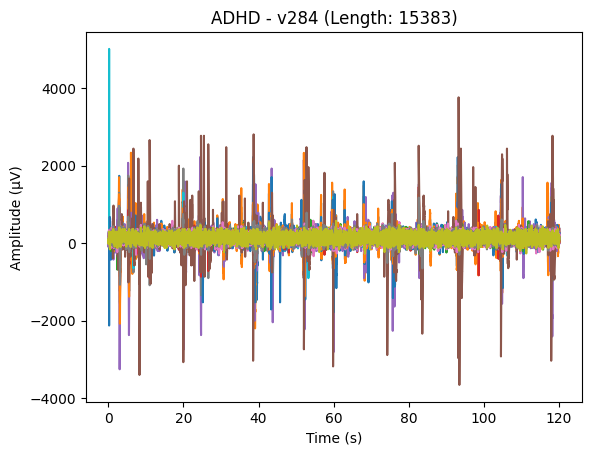

v284: Length = 15383


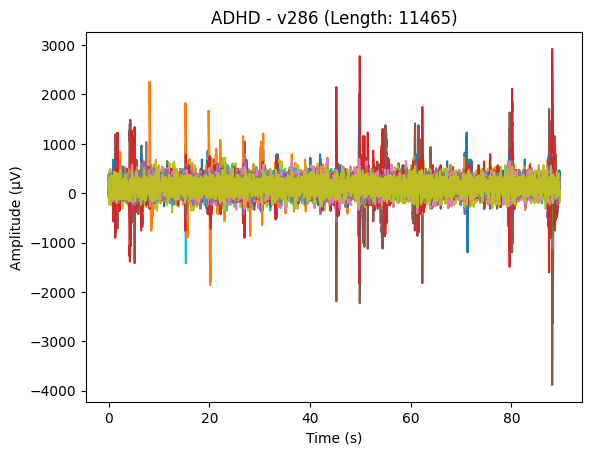

v286: Length = 11465


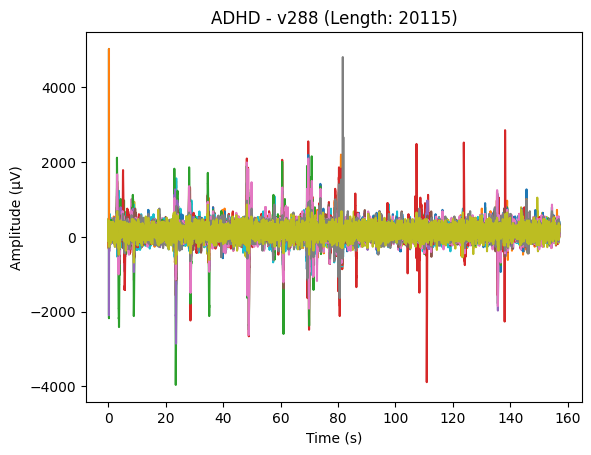

v288: Length = 20115


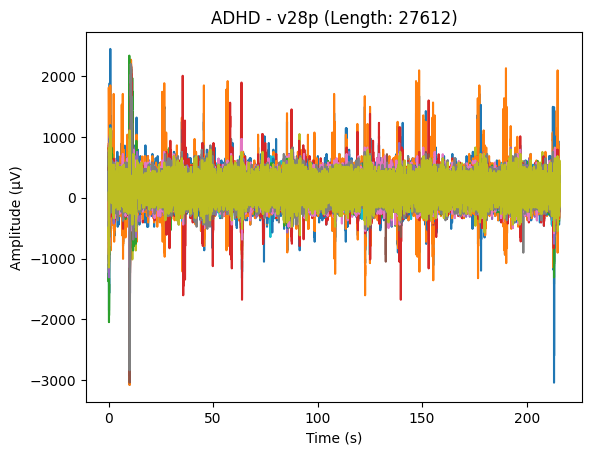

v28p: Length = 27612


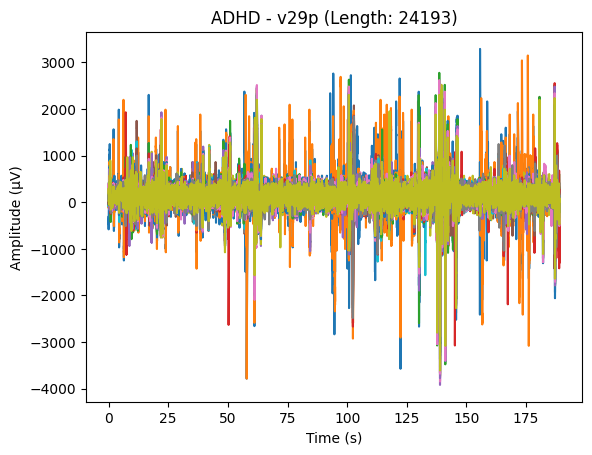

v29p: Length = 24193


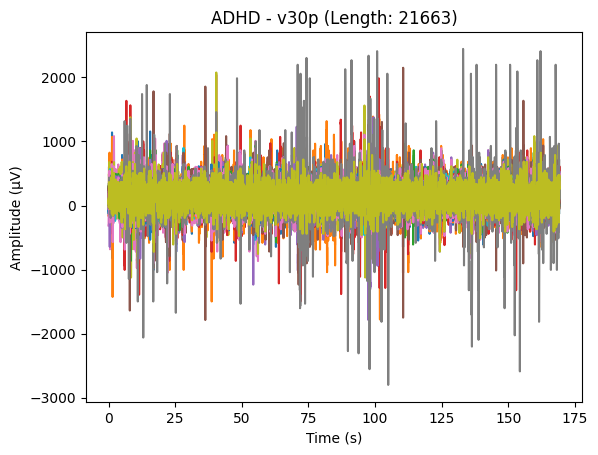

v30p: Length = 21663


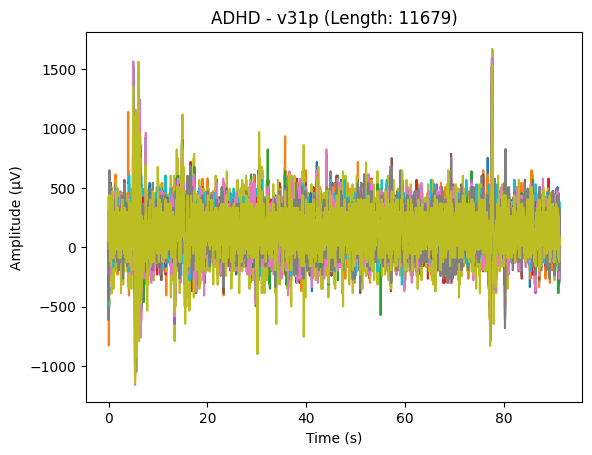

v31p: Length = 11679


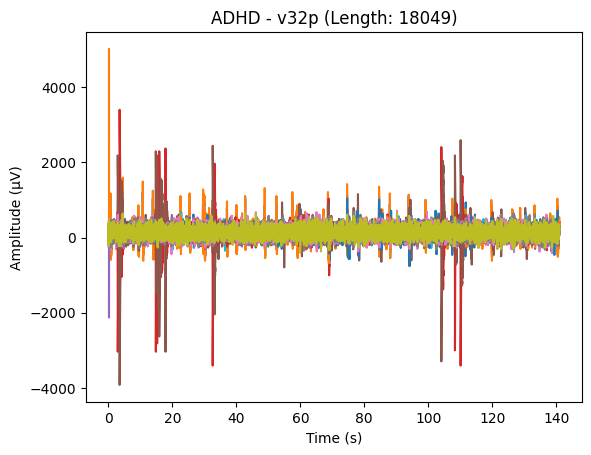

v32p: Length = 18049


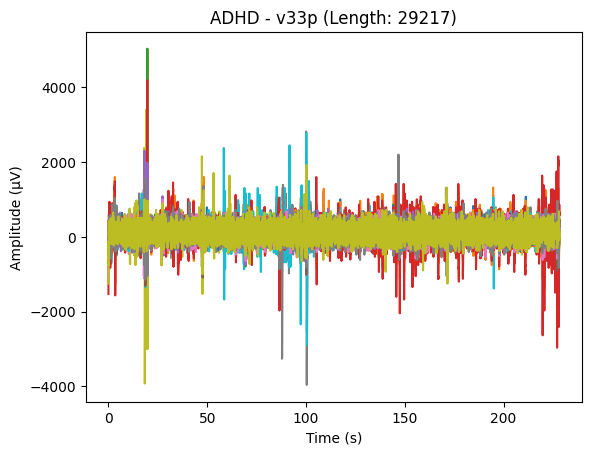

v33p: Length = 29217


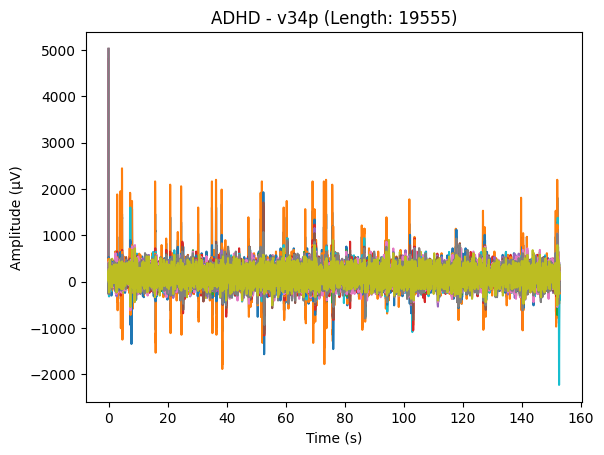

v34p: Length = 19555


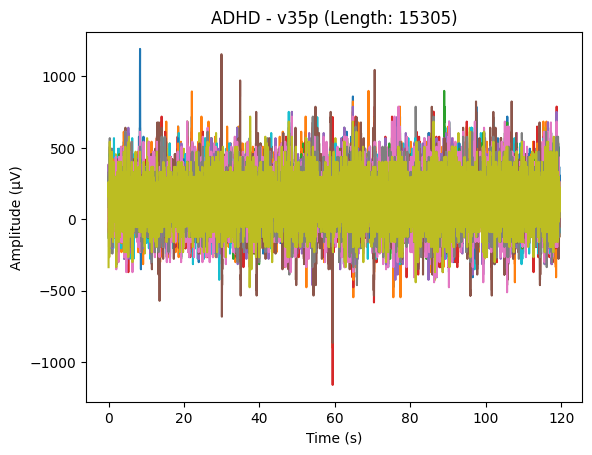

v35p: Length = 15305


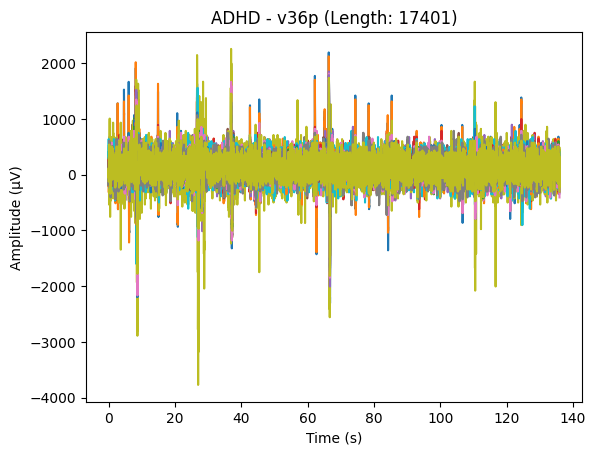

v36p: Length = 17401


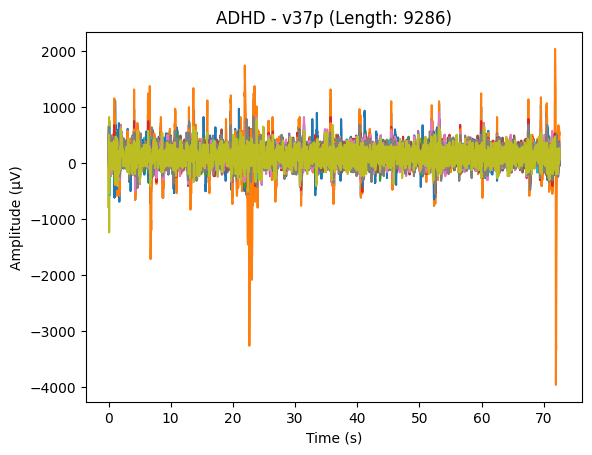

v37p: Length = 9286


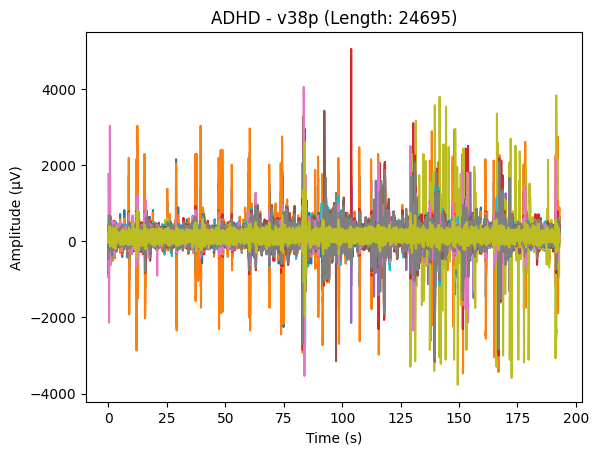

v38p: Length = 24695


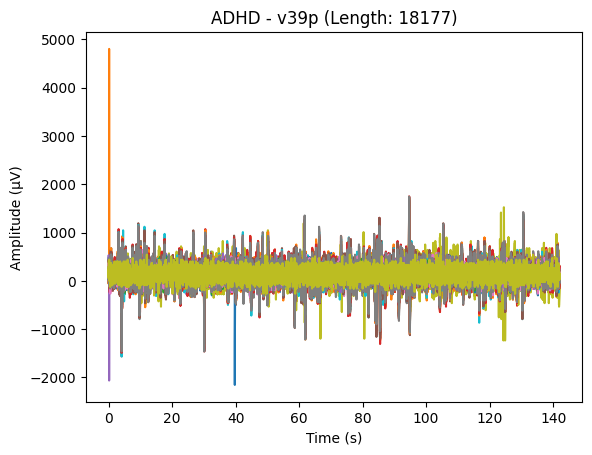

v39p: Length = 18177


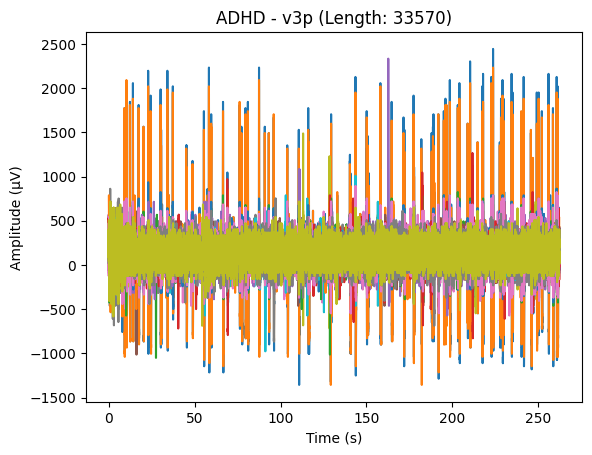

v3p: Length = 33570


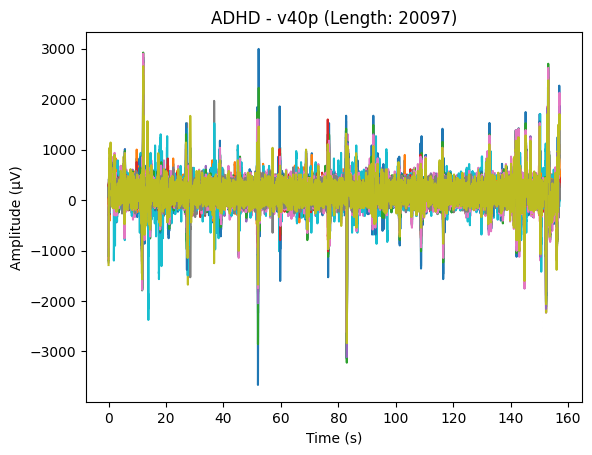

v40p: Length = 20097


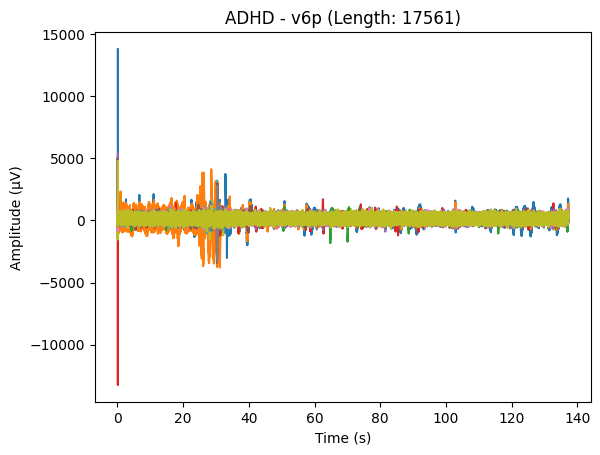

v6p: Length = 17561


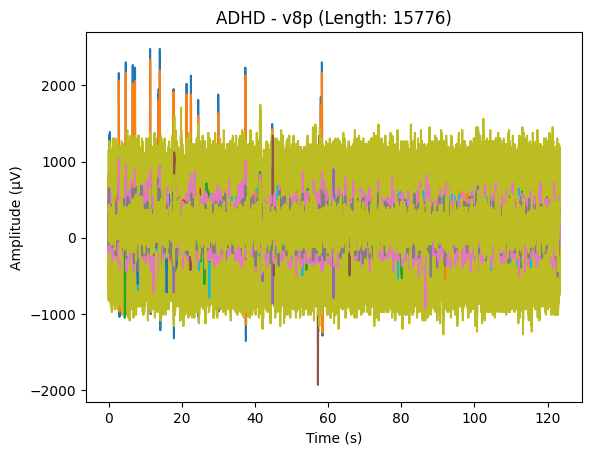

v8p: Length = 15776
Control Data:


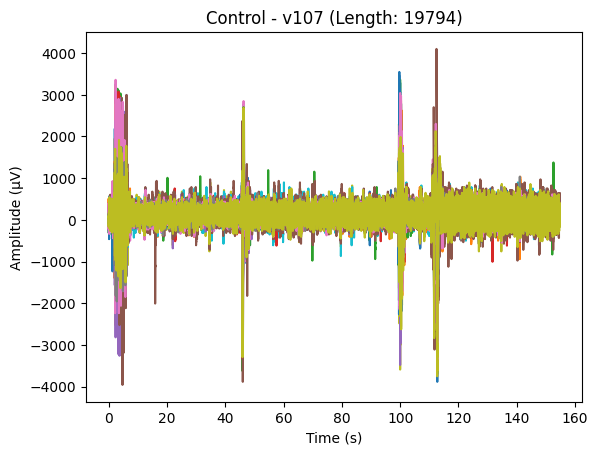

v107: Length = 19794


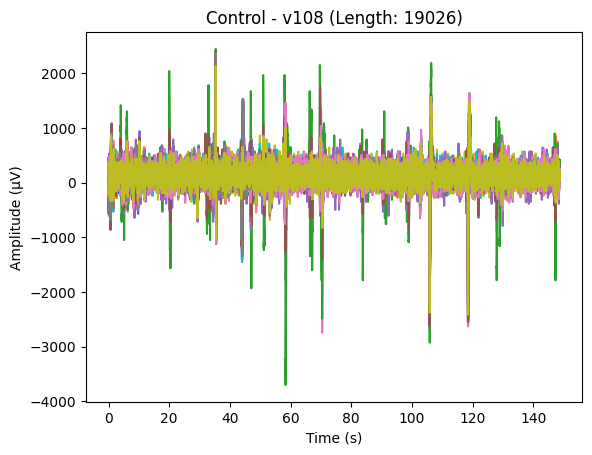

v108: Length = 19026


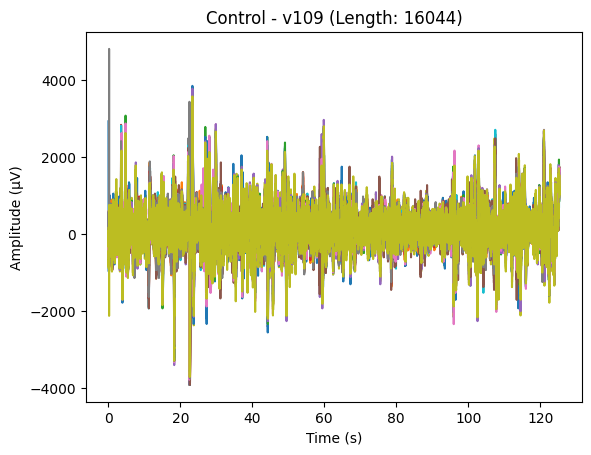

v109: Length = 16044


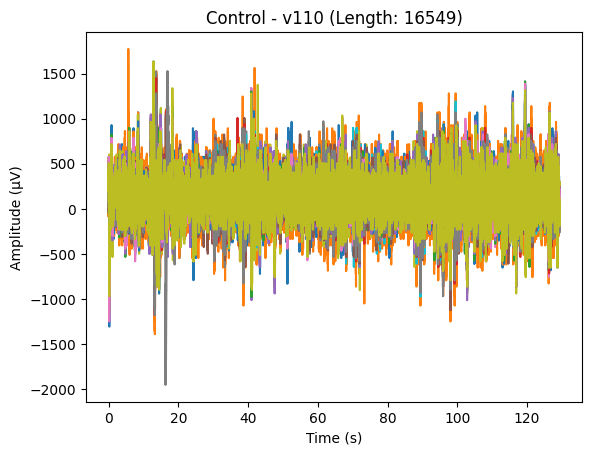

v110: Length = 16549


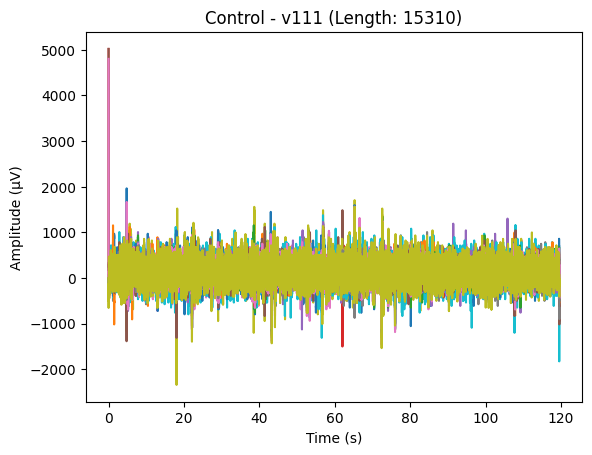

v111: Length = 15310


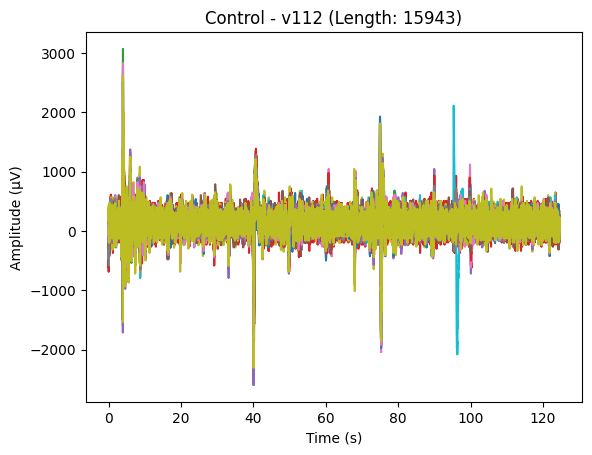

v112: Length = 15943


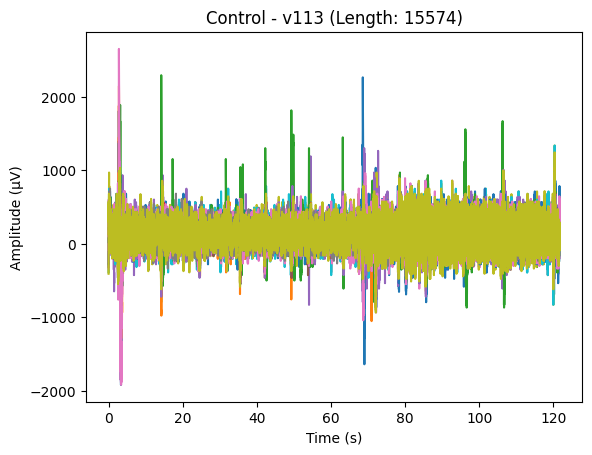

v113: Length = 15574


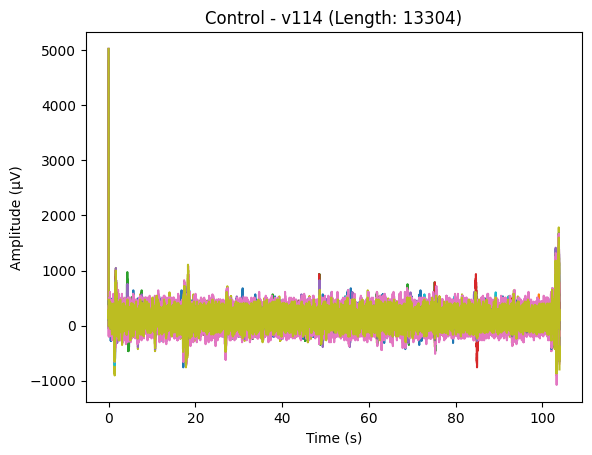

v114: Length = 13304


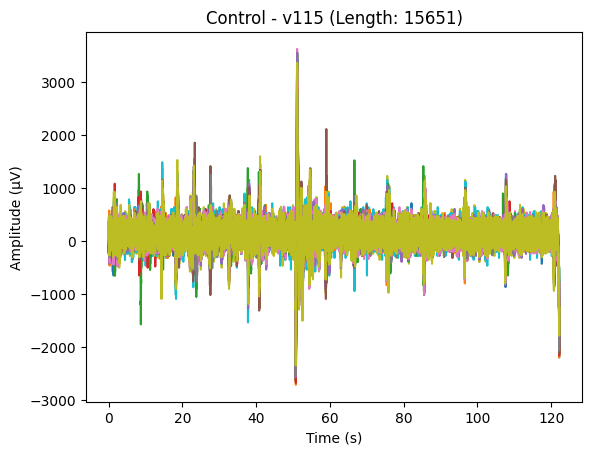

v115: Length = 15651


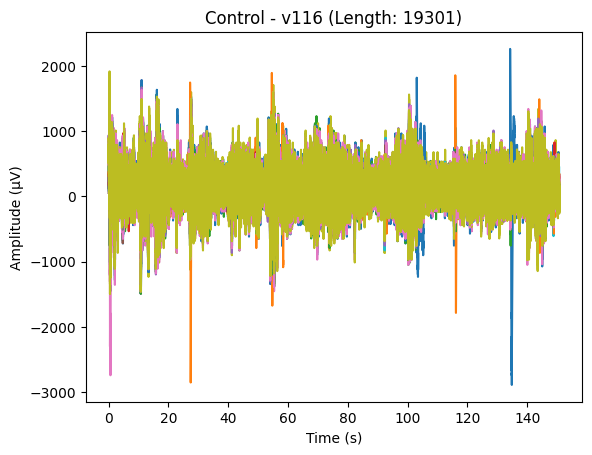

v116: Length = 19301


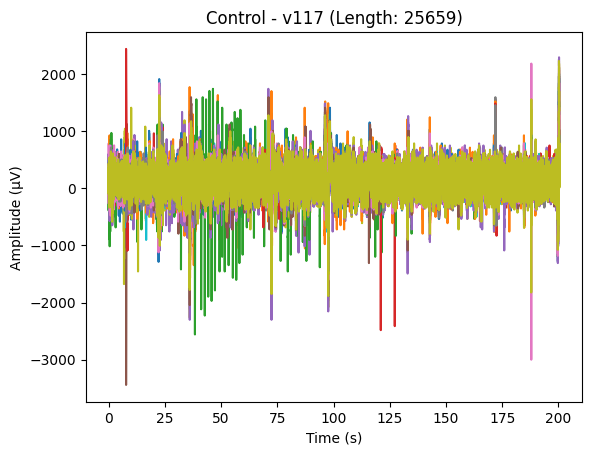

v117: Length = 25659


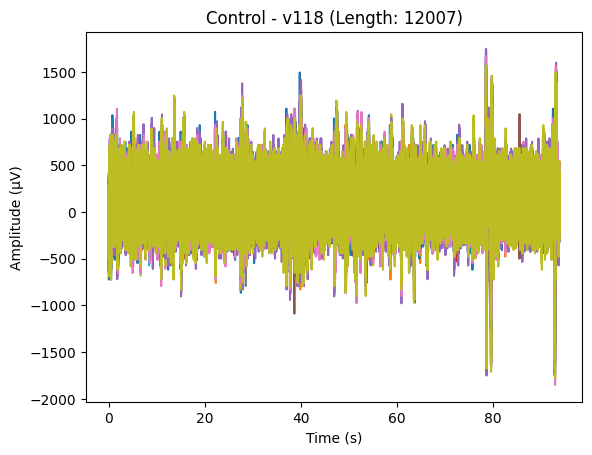

v118: Length = 12007


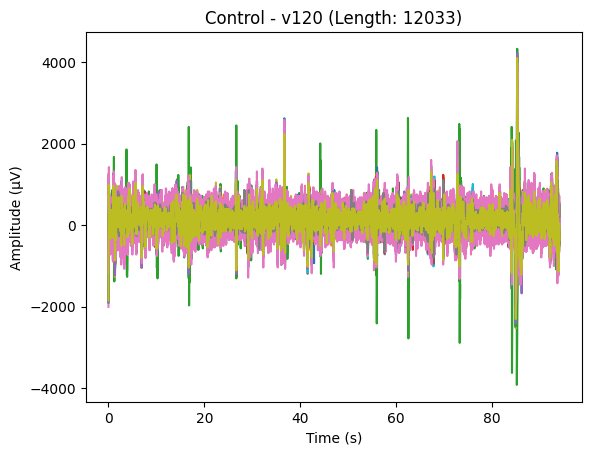

v120: Length = 12033


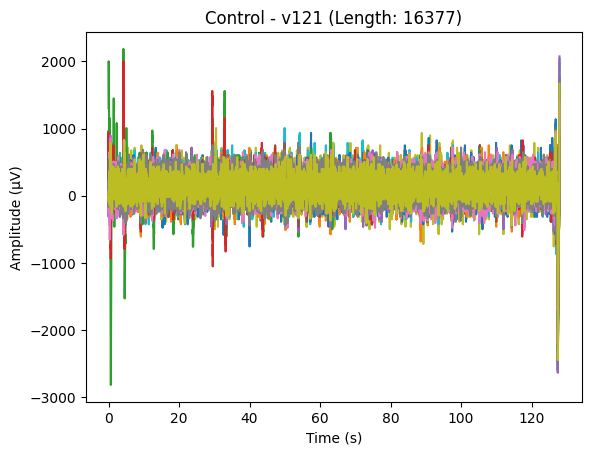

v121: Length = 16377


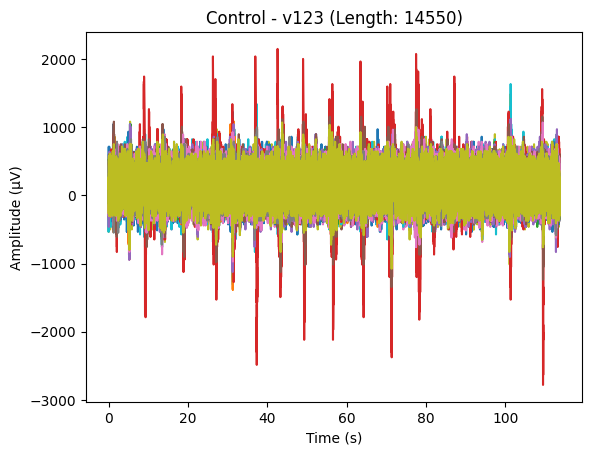

v123: Length = 14550


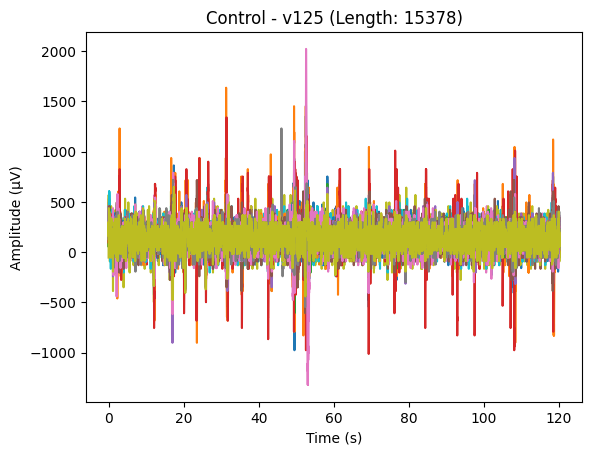

v125: Length = 15378


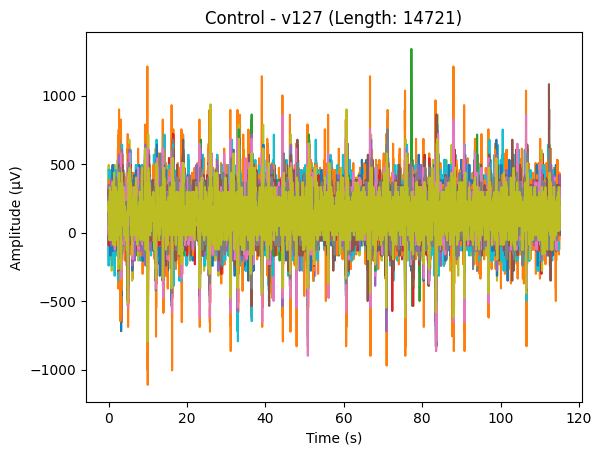

v127: Length = 14721


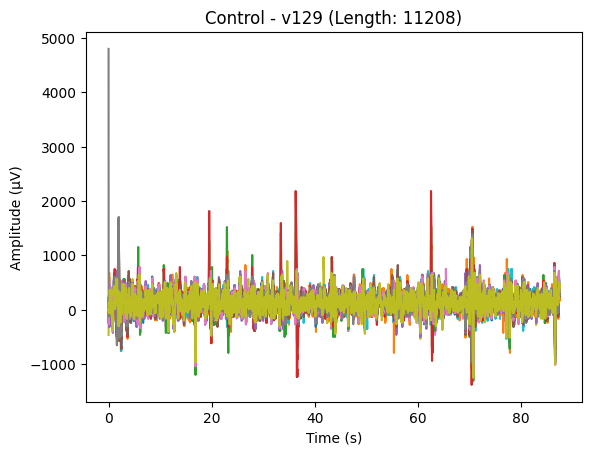

v129: Length = 11208


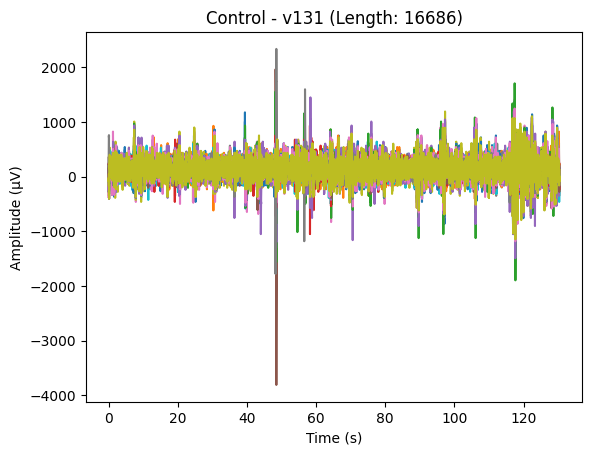

v131: Length = 16686


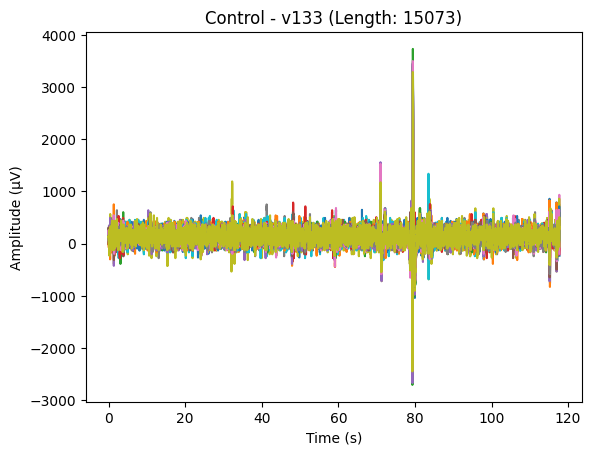

v133: Length = 15073


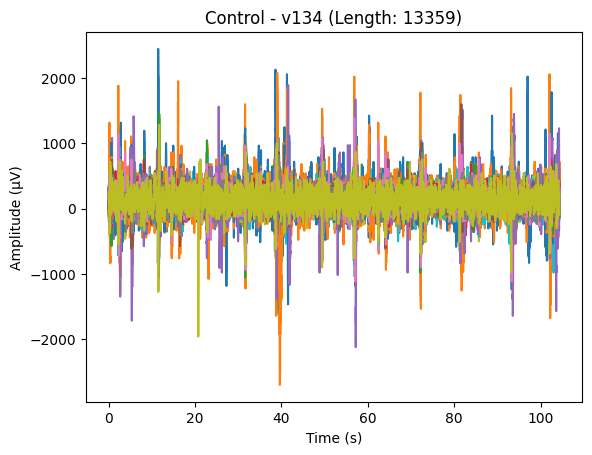

v134: Length = 13359


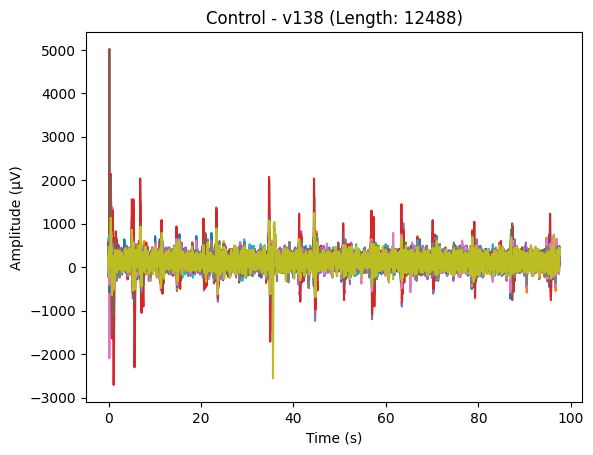

v138: Length = 12488


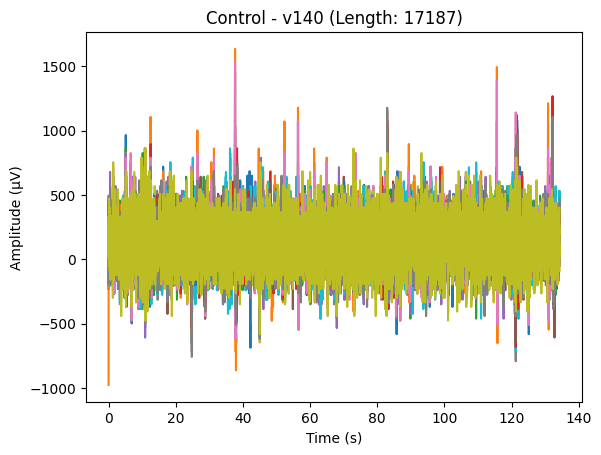

v140: Length = 17187


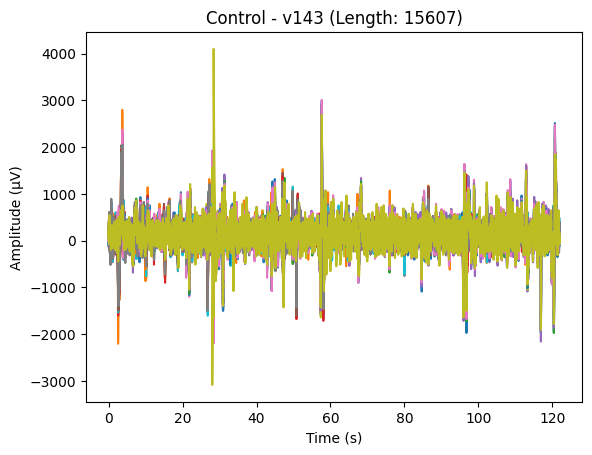

v143: Length = 15607


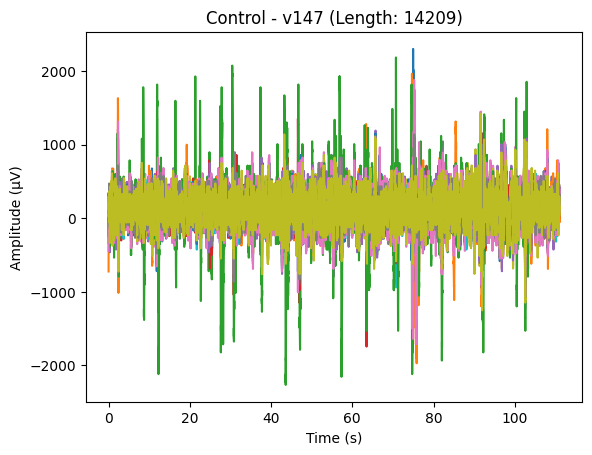

v147: Length = 14209


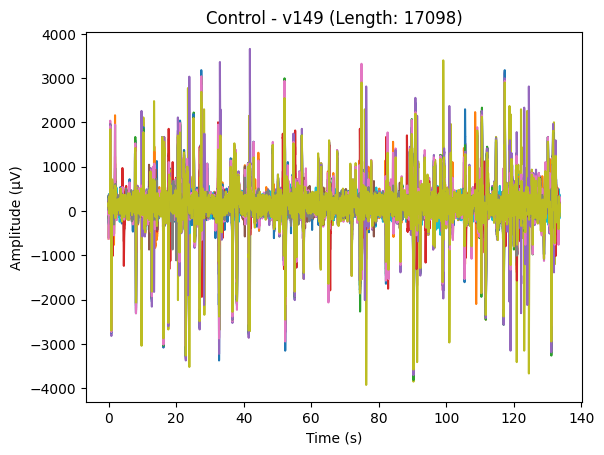

v149: Length = 17098


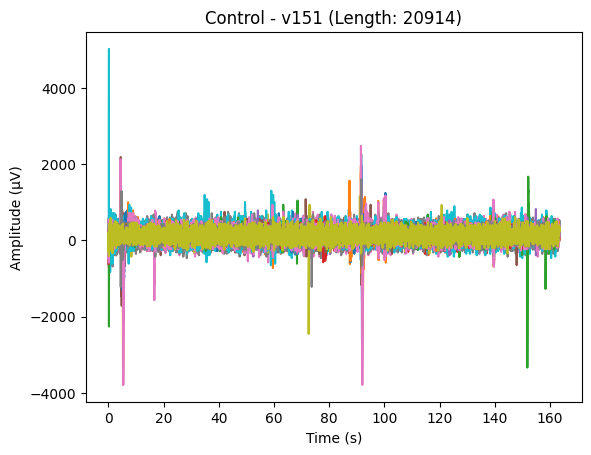

v151: Length = 20914


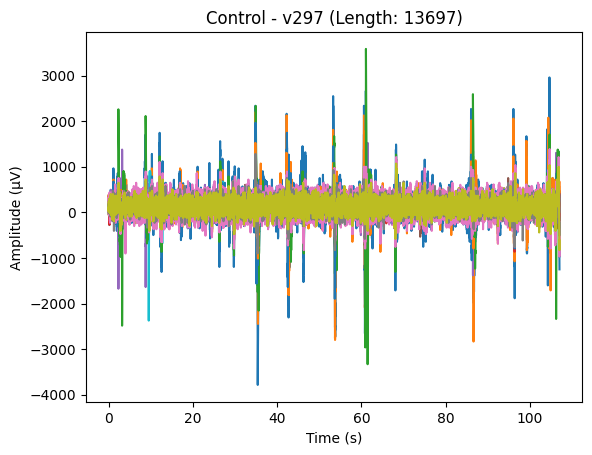

v297: Length = 13697


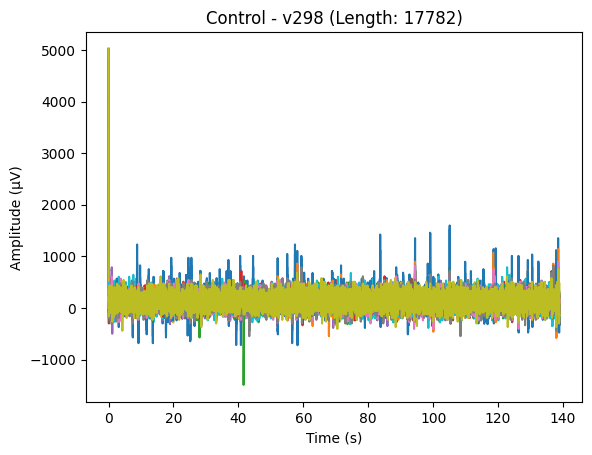

v298: Length = 17782


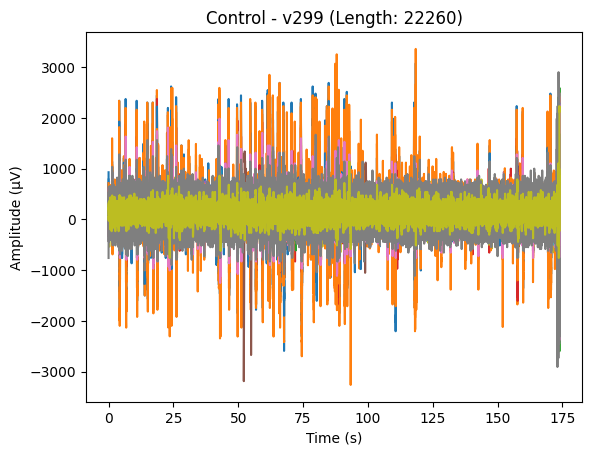

v299: Length = 22260


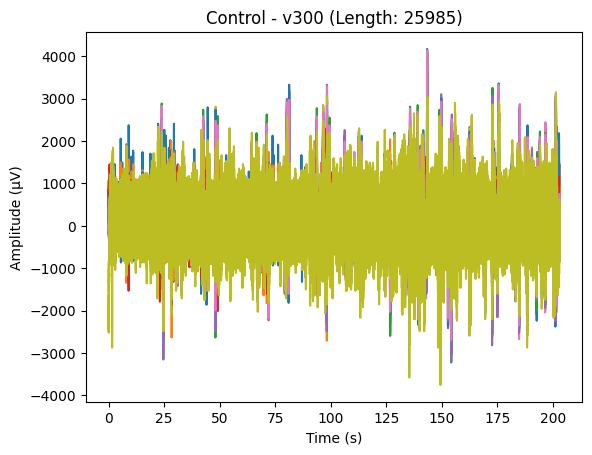

v300: Length = 25985


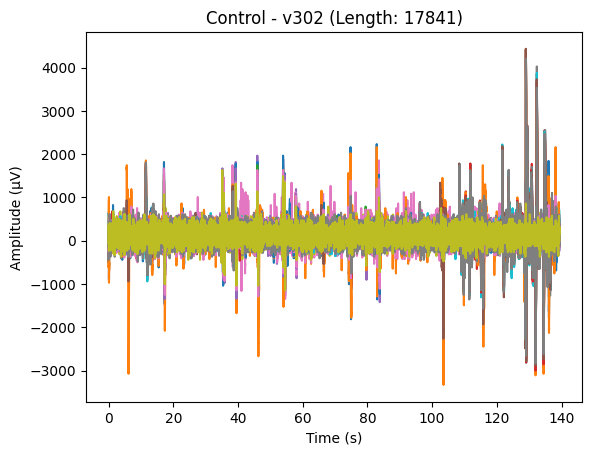

v302: Length = 17841


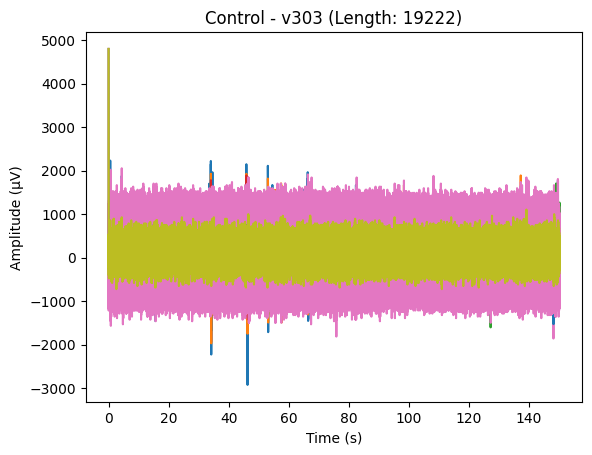

v303: Length = 19222


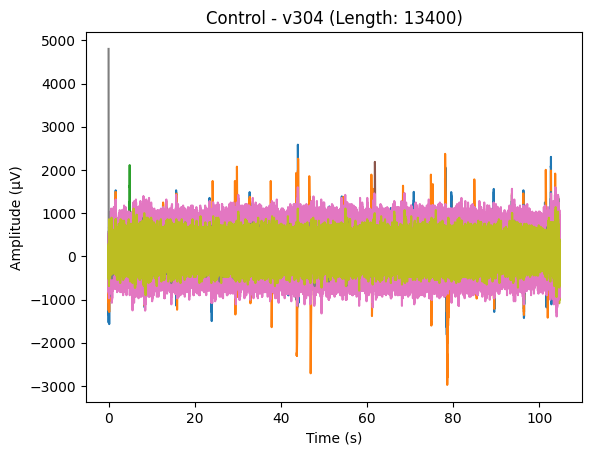

v304: Length = 13400


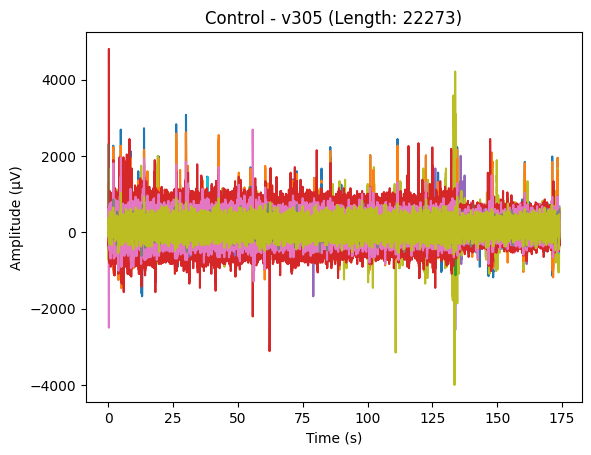

v305: Length = 22273


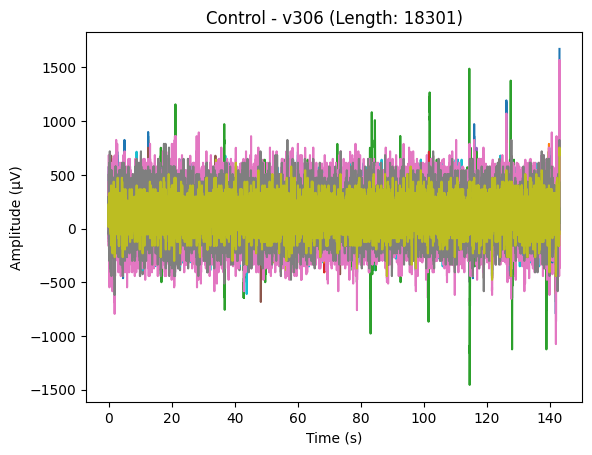

v306: Length = 18301


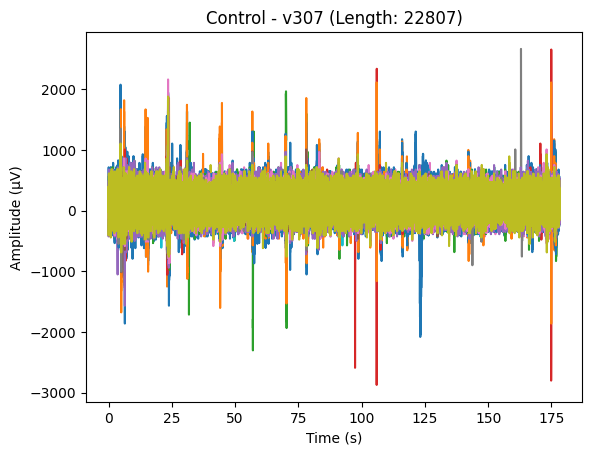

v307: Length = 22807


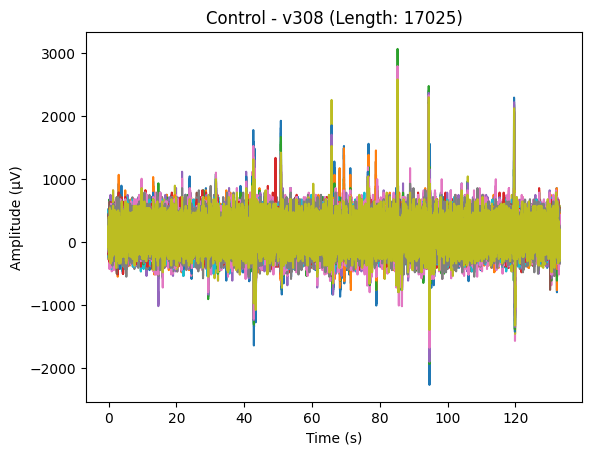

v308: Length = 17025


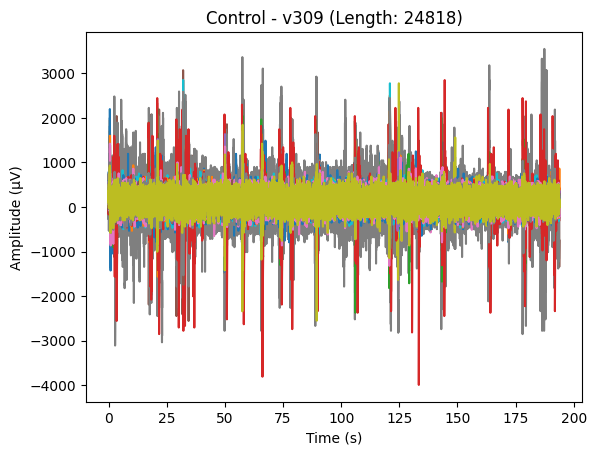

v309: Length = 24818


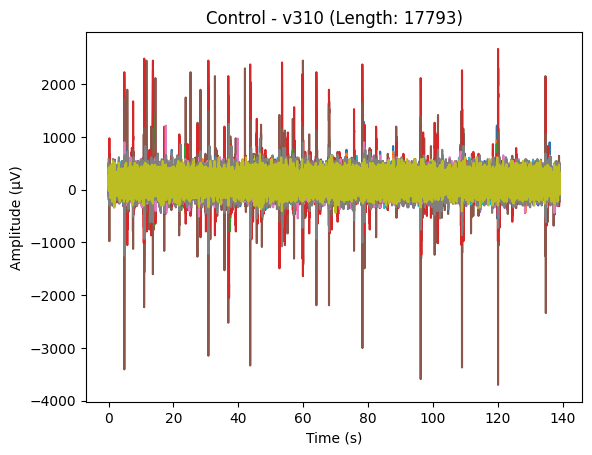

v310: Length = 17793


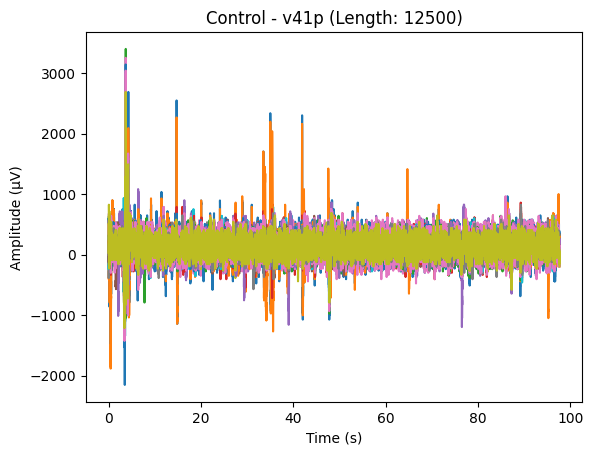

v41p: Length = 12500


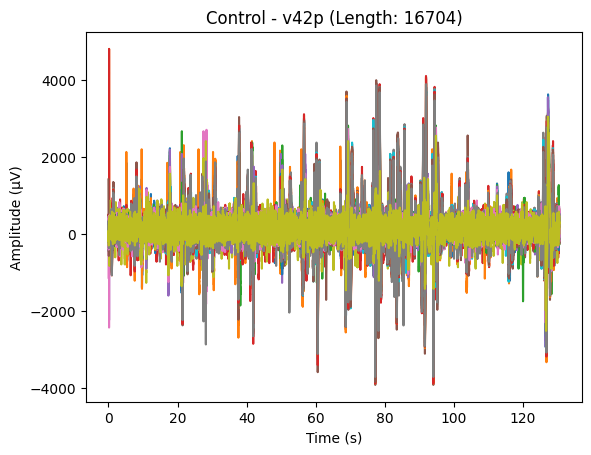

v42p: Length = 16704


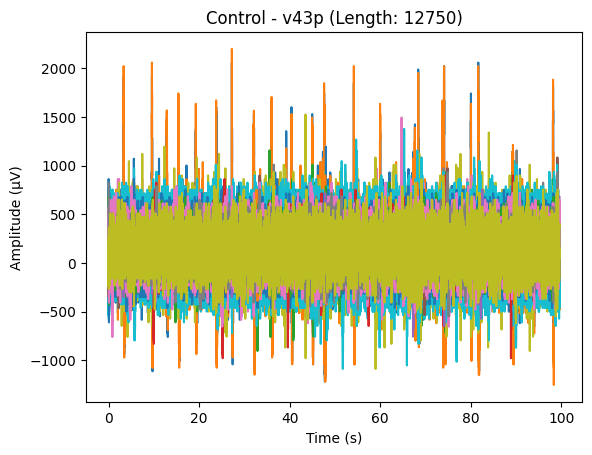

v43p: Length = 12750


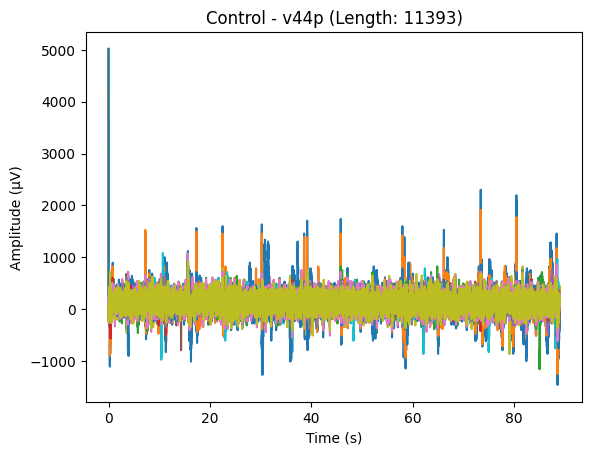

v44p: Length = 11393


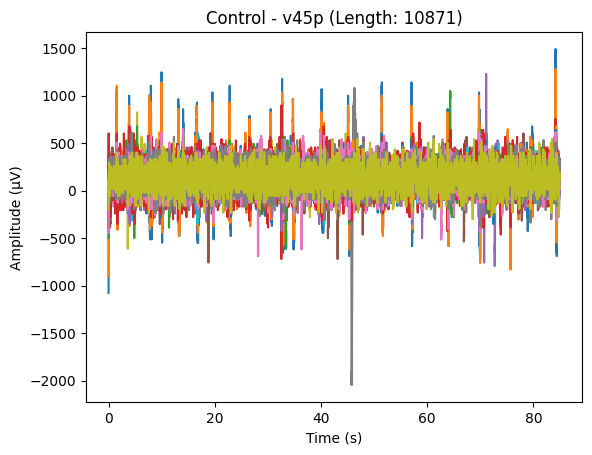

v45p: Length = 10871


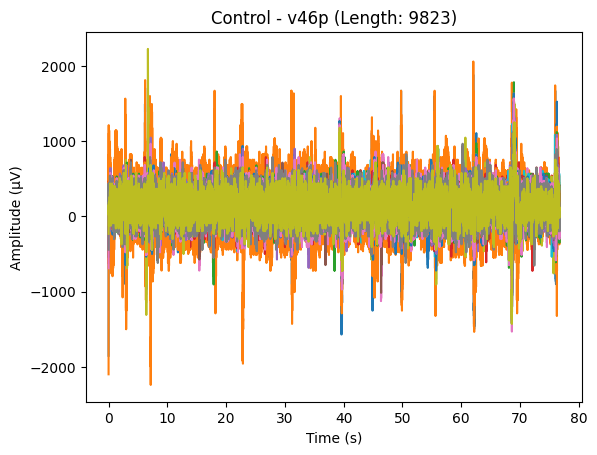

v46p: Length = 9823


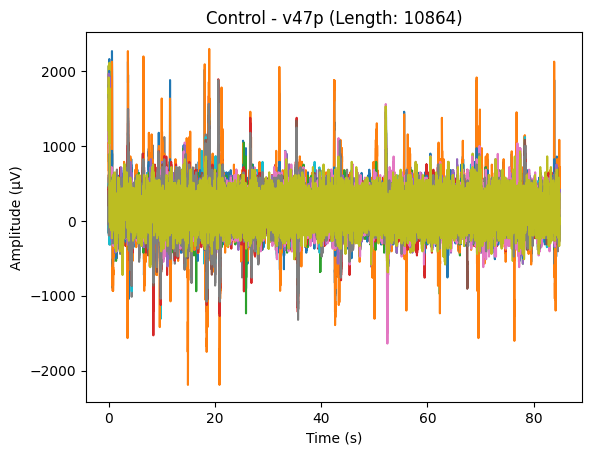

v47p: Length = 10864


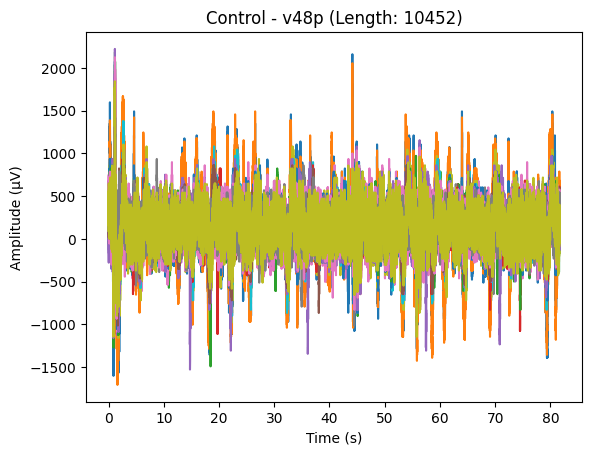

v48p: Length = 10452


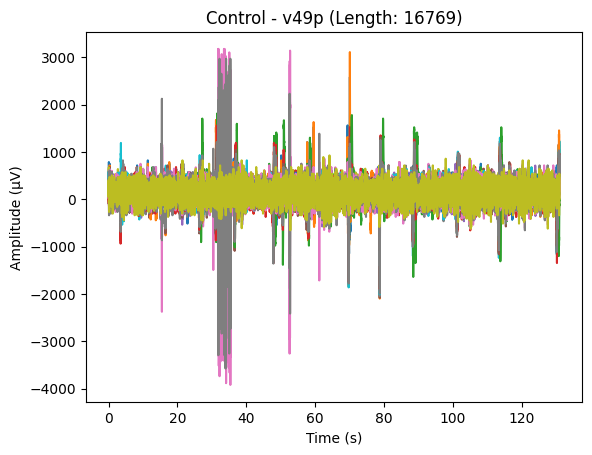

v49p: Length = 16769


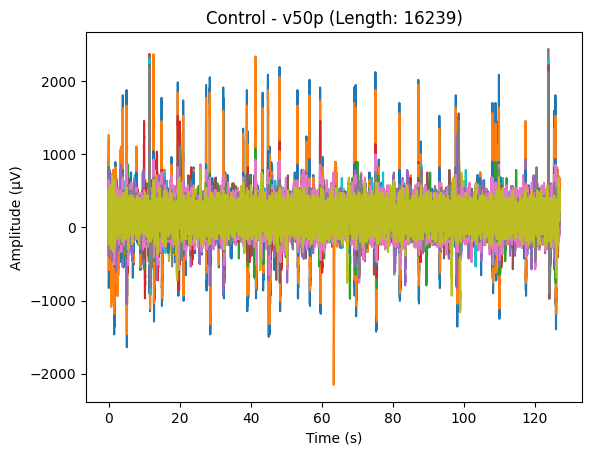

v50p: Length = 16239


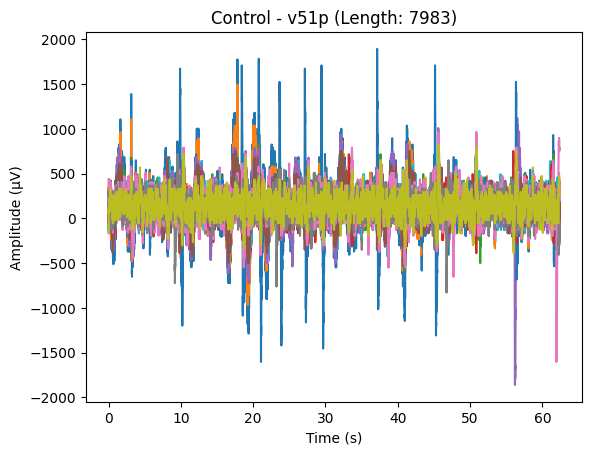

v51p: Length = 7983


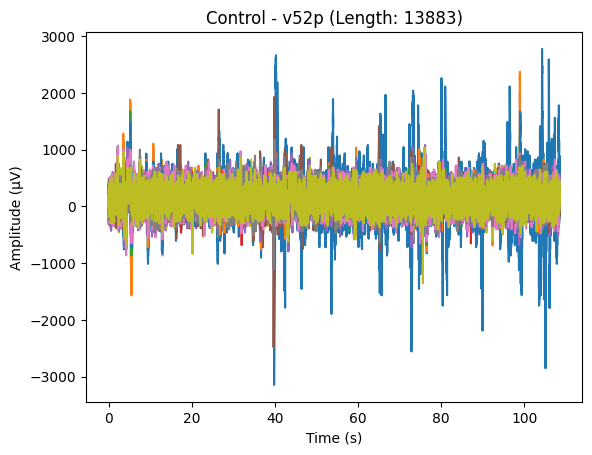

v52p: Length = 13883


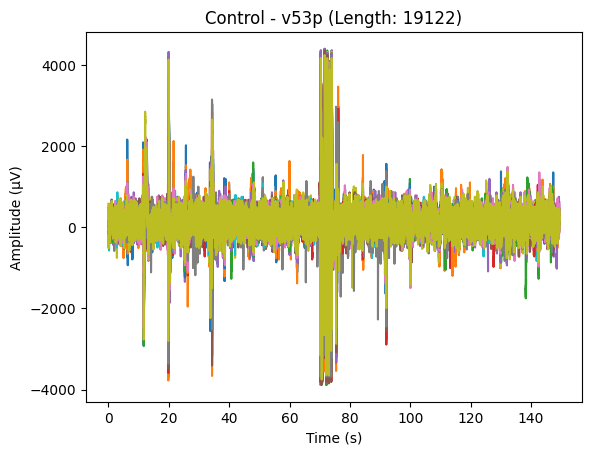

v53p: Length = 19122


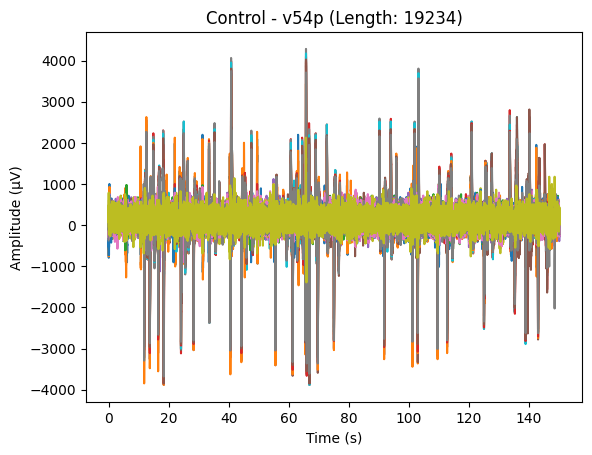

v54p: Length = 19234


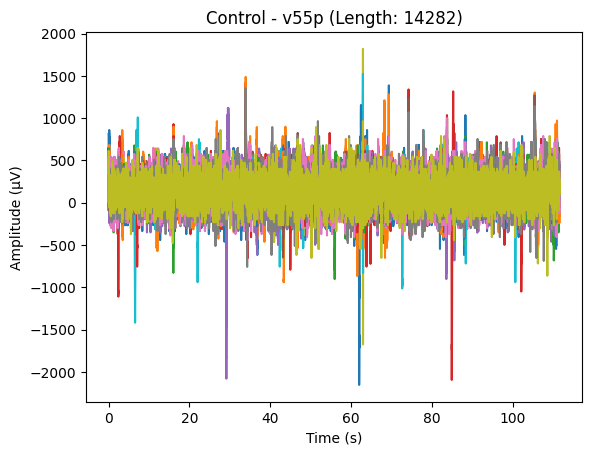

v55p: Length = 14282


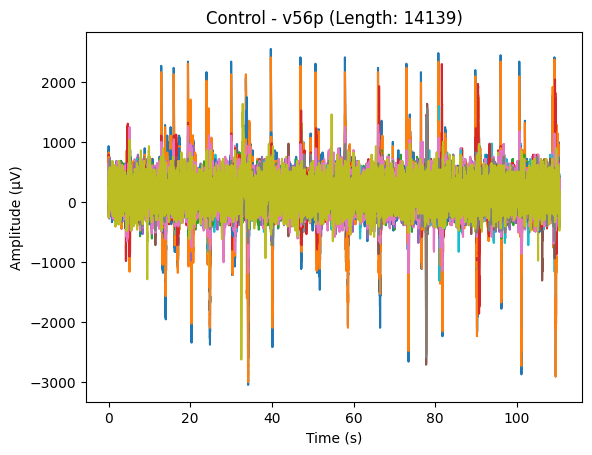

v56p: Length = 14139


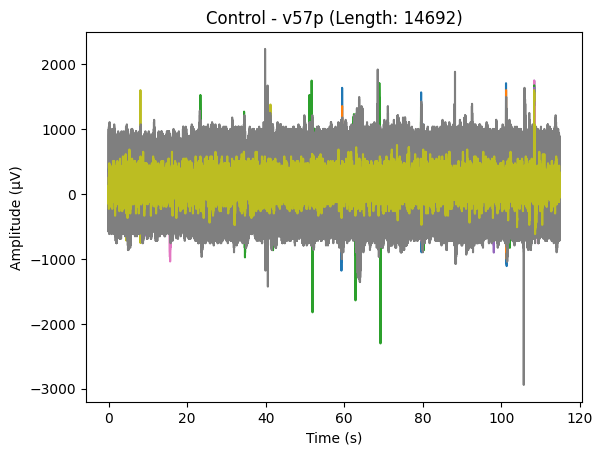

v57p: Length = 14692


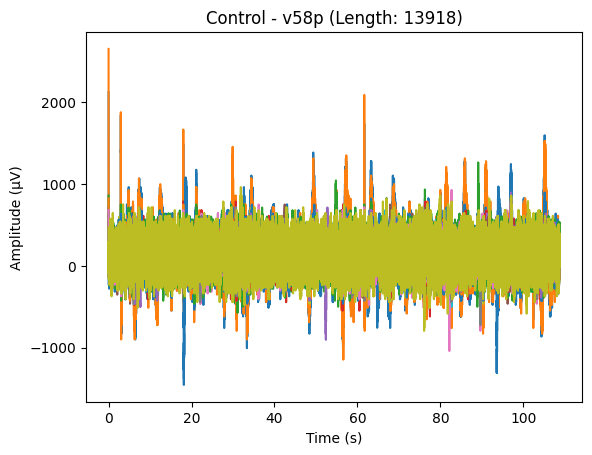

v58p: Length = 13918


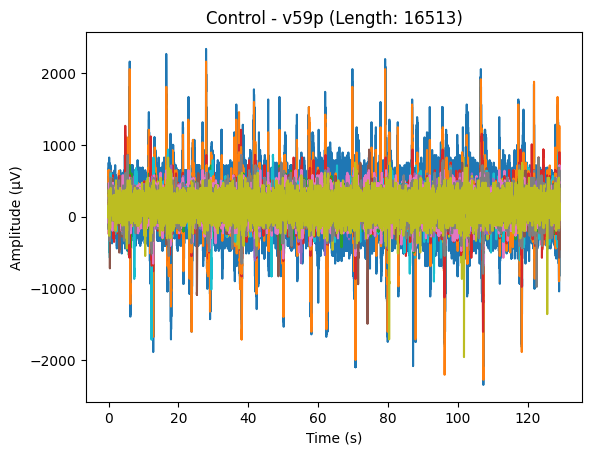

v59p: Length = 16513


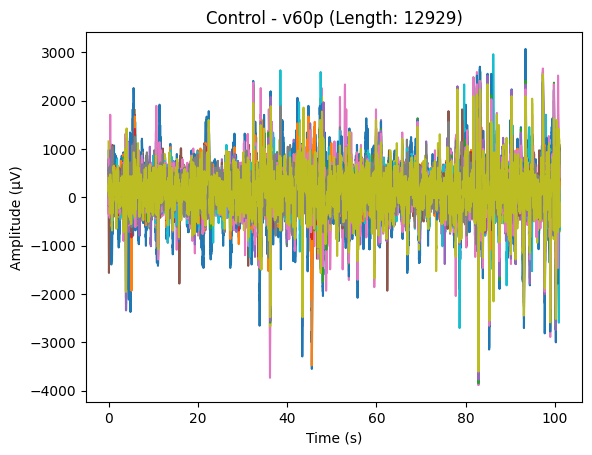

v60p: Length = 12929


In [2]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# 디렉토리 경로
adhd_dir = r"C:\Users\dlwld\Downloads\ADHD_raw"
control_dir = r"C:\Users\dlwld\Downloads\Control_raw"

# 샘플링 주파수
sampling_frequency = 128  # Hz
sampling_interval = 1 / sampling_frequency  # 샘플 간 시간 간격

# 특정 디렉토리 내 모든 .mat 파일 불러오기
def load_mat_files(directory):
    mat_files = {}
    for filename in os.listdir(directory):
        if filename.endswith('.mat'):
            file_path = os.path.join(directory, filename)
            mat_data = scipy.io.loadmat(file_path)
            # 파일명과 같은 key로 접근
            key_name = filename.replace('.mat', '')
            if key_name in mat_data:
                mat_files[key_name] = mat_data[key_name]
            else:
                print(f"Warning: {key_name} not found in {filename}")
    return mat_files

# ADHD 및 Control 파일 불러오기
adhd_data = load_mat_files(adhd_dir)
control_data = load_mat_files(control_dir)

# 데이터 플롯 및 길이 출력
def plot_data(data, title_prefix):
    for key, value in data.items():
        time_axis = np.arange(0, len(value) * sampling_interval, sampling_interval)  # 시간축 생성
        plt.figure()
        plt.plot(time_axis, value)
        plt.title(f"{title_prefix} - {key} (Length: {len(value)})")
        plt.xlabel("Time (s)")  # x축: 시간 (초)
        plt.ylabel("Amplitude (μV)")  # y축: 전압 (마이크로볼트) 또는 다른 적절한 단위
        plt.show()
        print(f"{key}: Length = {len(value)}")

# 플롯 및 길이 출력
print("ADHD Data:")
plot_data(adhd_data, "ADHD")

print("Control Data:")
plot_data(control_data, "Control")

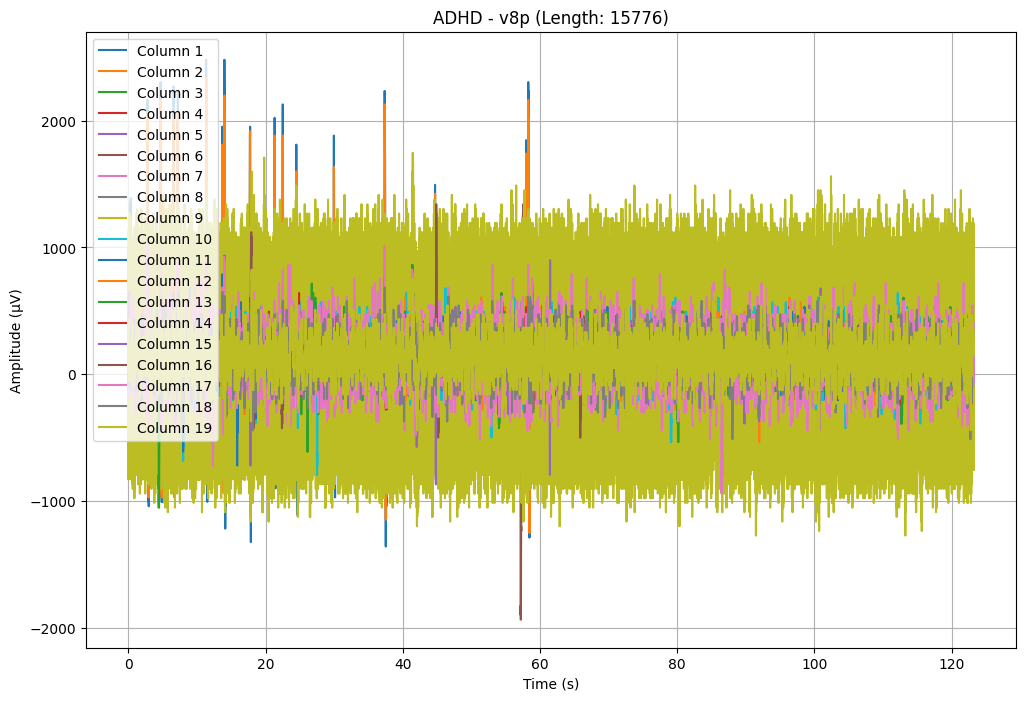

In [6]:
# 각 열을 하나의 플롯에서 플롯하고, 범례 추가
def plot_columns_with_legend(data, file_number, title_prefix):
    key = f"v{file_number}p"  # 사용자가 입력한 숫자 파일을 찾음
    if key in data:
        value = data[key]
        time_axis = np.arange(0, len(value) * sampling_interval, sampling_interval)  # 시간축 생성
        plt.figure(figsize=(12, 8))  # 플롯 창 크기 조정 (가로, 세로)
        if len(value.shape) > 1:  # 다차원 데이터인 경우 (즉, 여러 열이 있는 경우)
            num_columns = value.shape[1]
            for col in range(num_columns):
                plt.plot(time_axis, value[:, col], label=f"Column {col+1}")
        else:
            plt.plot(time_axis, value, label="Column 1")
        
        plt.title(f"{title_prefix} - {key} (Length: {len(value)})")
        plt.xlabel("Time (s)")  # x축: 시간 (초)
        plt.ylabel("Amplitude (μV)")  # y축: 전압 (마이크로볼트) 또는 다른 적절한 단위
        plt.legend()  # 범례 추가
        plt.grid(True)  # 그리드 추가 (선택 사항)
        plt.show()
    else:
        print(f"File {key} not found in {title_prefix} data.")

# 숫자를 정의하면 해당 파일의 데이터를 출력하는 함수 호출
def get_file_data_by_number(file_number, dataset='ADHD'):
    if dataset == 'ADHD':
        plot_columns_with_legend(adhd_data, file_number, "ADHD")
    elif dataset == 'Control':
        plot_columns_with_legend(control_data, file_number, "Control")
    else:
        print("Invalid dataset. Choose either 'ADHD' or 'Control'.")

# 예시 사용
# 원하는 파일 번호를 여기에 입력 (예: v8p)
get_file_data_by_number(8, 'ADHD')  # 'ADHD' 또는 'Control' 선택 가능

In [ ]:
# 특정 파일을 자세히 출력하는 함수
def print_specific_file_data(data, file_number, title_prefix):
    key = f"v{file_number}"  # 사용자가 입력한 숫자 뒤에 'v'가 붙은 파일명을 찾음
    if key in data:
        value = data[key]
        time_axis = np.arange(0, len(value) * sampling_interval, sampling_interval)  # 시간축 생성
        print(f"Detail for {title_prefix} - {key}:")
        print(f"Length of data: {len(value)}")
        print(f"Data (first 10 points): {value[:10]}")  # 첫 10개 데이터 포인트 출력
        print(f"Data stats: Mean = {np.mean(value)}, Std Dev = {np.std(value)}")
        plt.figure()
        plt.plot(time_axis, value)
        plt.title(f"{title_prefix} - {key} (Length: {len(value)})")
        plt.xlabel("Time (s)")  # x축: 시간 (초)
        plt.ylabel("Amplitude (μV)")  # y축: 전압 (마이크로볼트) 또는 다른 적절한 단위
        plt.show()
    else:
        print(f"File {key} not found in {title_prefix} data.")